# Analyzing Netflix Content Trend

### A Data-Driven Exploration of Genres, Ratings, and Global Contributions.

# Rahul Manjhi

# Import Libraries


In [89]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data:

In [92]:
# Load dataset
file_path = 'netflix_titles_2021.csv'
df = pd.read_csv(file_path)


In [94]:
# Display the first few rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Cleaning:


In [98]:
# Check for missing values
missing_values = df.isnull().sum()

df_cleaned = df.dropna(subset=['date_added', 'rating', 'duration'])


In [99]:
# Display the number of missing values after cleaning
print("Missing values after initial cleaning:")
print(df_cleaned.isnull().sum())

Missing values after initial cleaning:
show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64


# Data Understanding:

## 1. Describe the Dataset


In [105]:
# Number of rows and columns
num_rows, num_columns = df_cleaned.shape
print(f"The dataset has {num_rows} rows and {num_columns} columns.")

The dataset has 8790 rows and 12 columns.


In [107]:
# Data types of each column
print("Data types of each column:")
print(df_cleaned.dtypes)

Data types of each column:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [108]:
# Display the first few rows of the dataset for a quick preview
print("First few rows of the dataset:")
print(df_cleaned.head())

First few rows of the dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons  

# 2. Summarize Central Tendency and Dispersion of Numerical Features


In [112]:
# Summary statistics for numerical columns
numerical_summary = df_cleaned.describe()
print("Summary statistics for numerical features:")
print(numerical_summary)

Summary statistics for numerical features:
       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [113]:
# Additional statistics like median
median_duration = df_cleaned['duration'].median() if df_cleaned['duration'].dtype != 'O' else 'N/A'
median_release_year = df_cleaned['release_year'].median()

print(f"Median duration: {median_duration}")
print(f"Median release year: {median_release_year}")

Median duration: N/A
Median release year: 2017.0


# 3. Explore the Distribution of Categorical Features


In [116]:
# Distribution of 'type' (Movies vs TV Shows)
type_distribution = df_cleaned['type'].value_counts()
print("Distribution of content type:")
print(type_distribution)


Distribution of content type:
type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [118]:
# Distribution of 'rating'
rating_distribution = df_cleaned['rating'].value_counts()
print("Distribution of content ratings:")
print(rating_distribution)

Distribution of content ratings:
rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [119]:
# Distribution of 'country'
country_distribution = df_cleaned['country'].value_counts().head(10)  
print("Top 10 countries by content count:")
print(country_distribution)


Top 10 countries by content count:
country
United States     2810
India              972
United Kingdom     418
Japan              243
South Korea        200
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [120]:
# Distribution of 'listed_in' (Genres)
genres_distribution = df_cleaned['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
print("Top 10 genres by content count:")
print(genres_distribution)

Top 10 genres by content count:
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


# 4: Create Histograms for Numerical Features


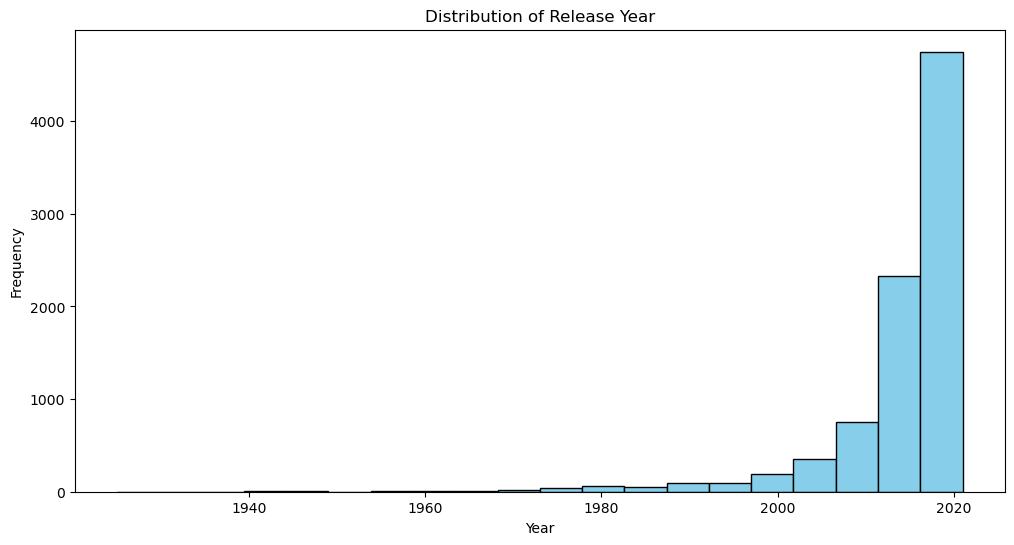

In [129]:
# Histogram for 'release_year'
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['release_year'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


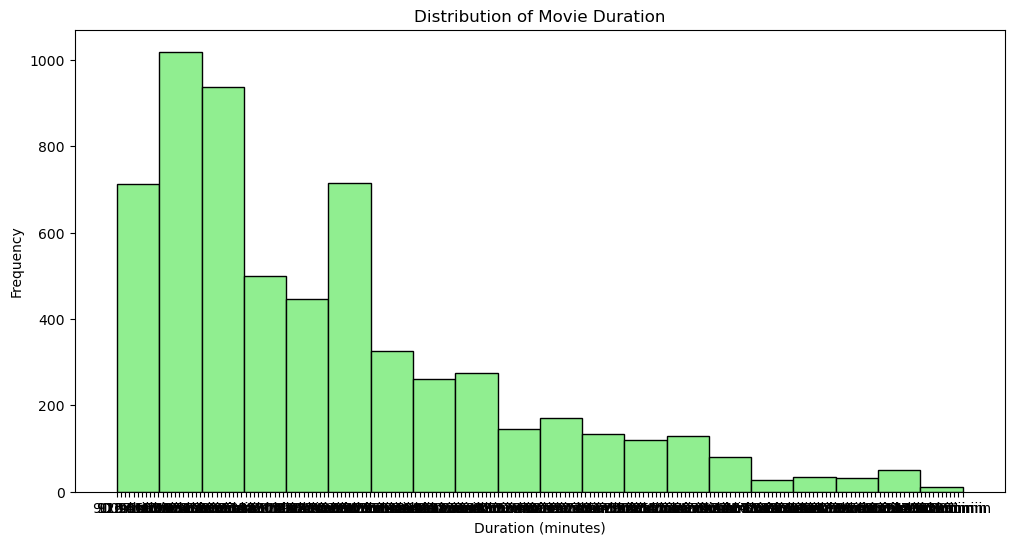

In [130]:
# Histogram for 'duration' (for movies only)
movies_duration = df_cleaned[df_cleaned['type'] == 'Movie']['duration'].dropna()

plt.figure(figsize=(12, 6))
plt.hist(movies_duration, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


# 5: Visualize the Distribution of Categorical Features


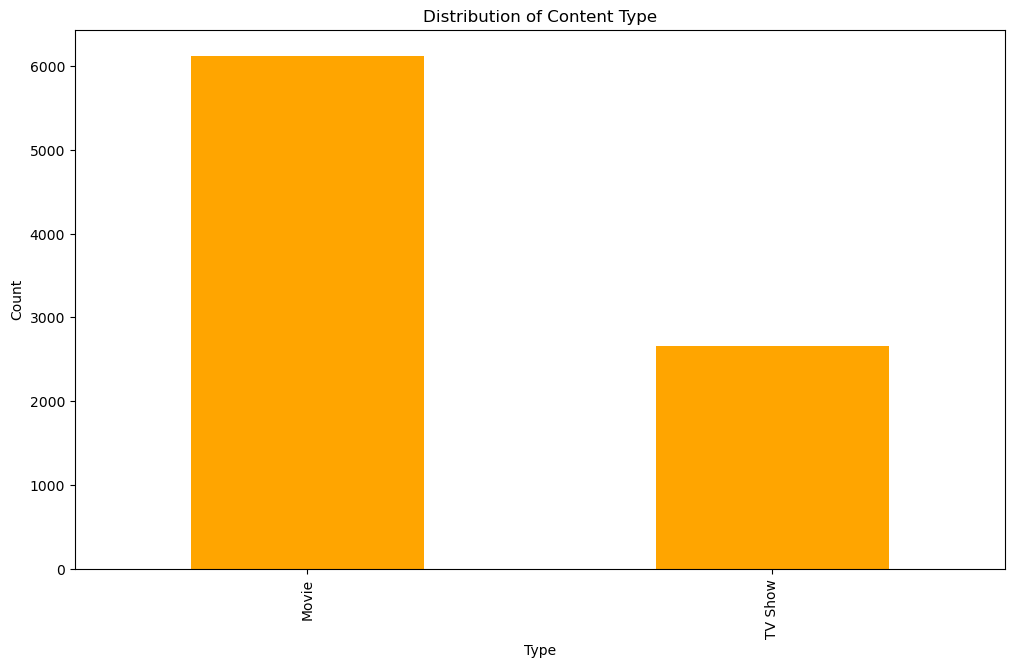

In [171]:
# Bar chart for 'type' (Movies vs TV Shows)
plt.figure(figsize=(12, 7))
df_cleaned['type'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


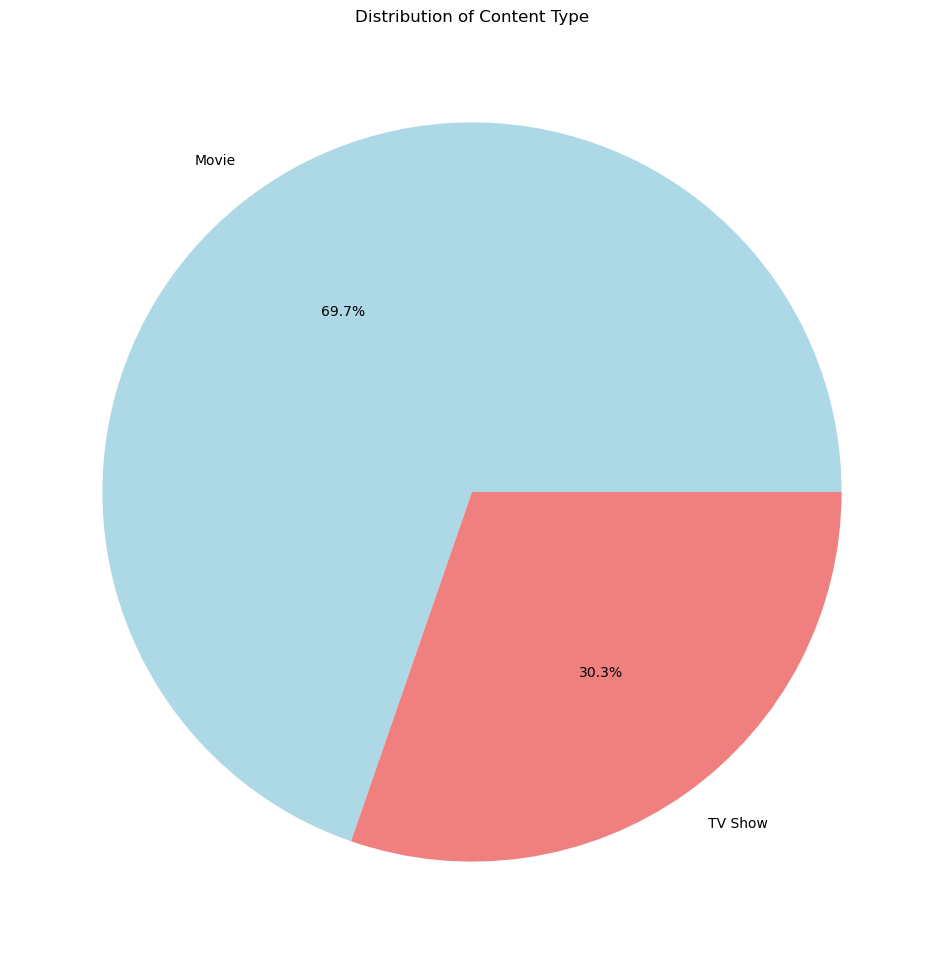

In [173]:

# Pie chart for 'type' (Movies vs TV Shows)
plt.figure(figsize=(13, 12))
df_cleaned['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Content Type')
plt.ylabel('')
plt.show()

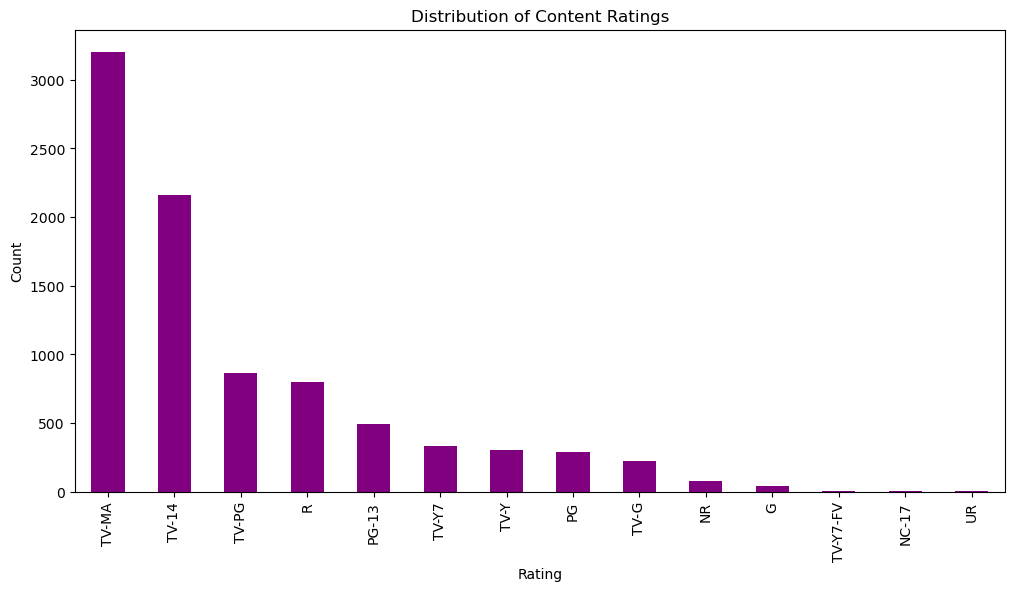

In [175]:
# Bar chart for 'rating'
plt.figure(figsize=(12, 6))
df_cleaned['rating'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# 6: Use Boxplots to Compare Distributions Across Different Groups or Categories

In [179]:
# Split the 'listed_in' column into a list of genres
df['genres'] = df['listed_in'].str.split(', ')

# Check if the 'genres' column is created
df.head()  # This should show the new 'genres' column


C:\Users\manjh\AppData\Local\Temp\ipykernel_13608\2117039894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genres'] = df['listed_in'].str.split(', ')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,representation,is_netflix_original,content_type,numeric_rating,age,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,False,Netflix Original,13.0,4,[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",False,False,Licensed Content,18.0,3,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,False,False,Netflix Original,18.0,3,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True,False,Netflix Original,18.0,3,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,False,False,Licensed Content,18.0,3,"[International TV Shows, Romantic TV Shows, TV..."


In [181]:
# Explode the 'genres' column to separate rows for each genre
exploded_data = df.explode('genres')

# Ensure 'release_year' and 'genres' columns are present
exploded_data = exploded_data[['release_year', 'genres']]


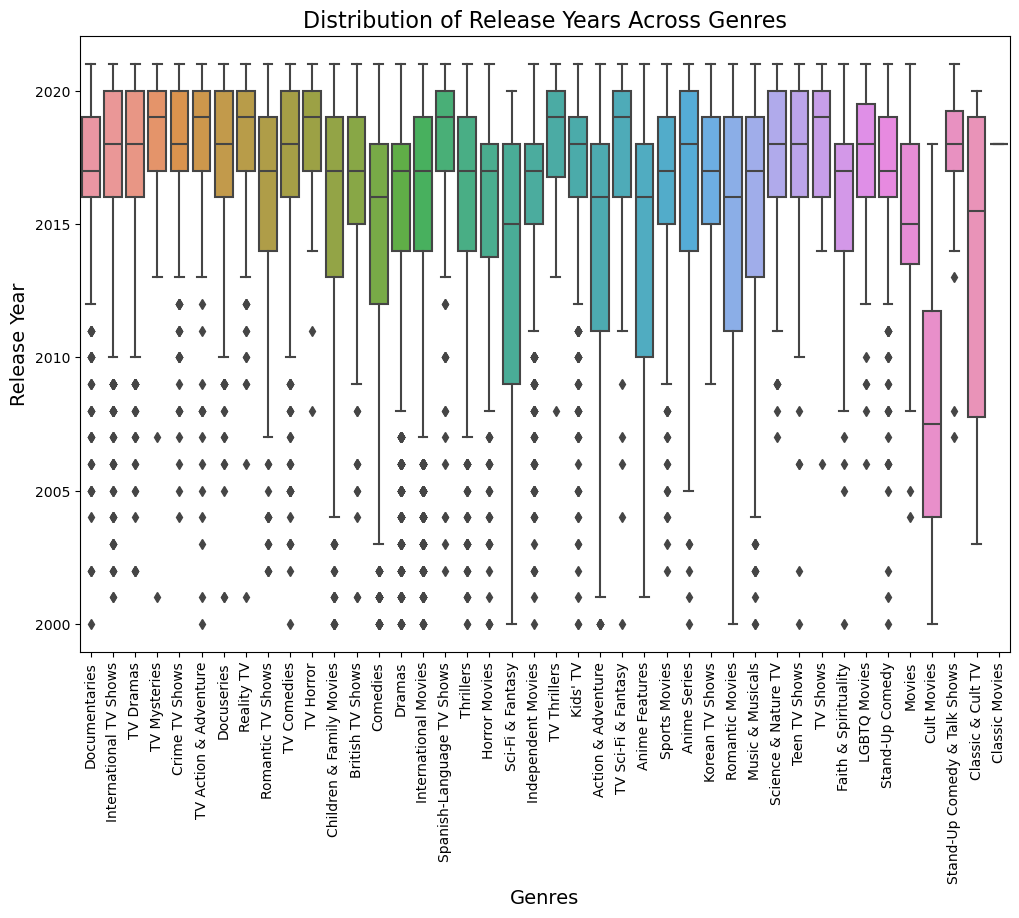

In [183]:
# Filter to include only recent years
recent_data = exploded_data[exploded_data['release_year'] >= 2000]

# Plot the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='release_year', data=recent_data)
plt.title('Distribution of Release Years Across Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Release Year', fontsize=14)
plt.xticks(rotation=90)
plt.show()


# 7: Explore Relationships Between Variables Using Scatter Plots or Correlation Matrices

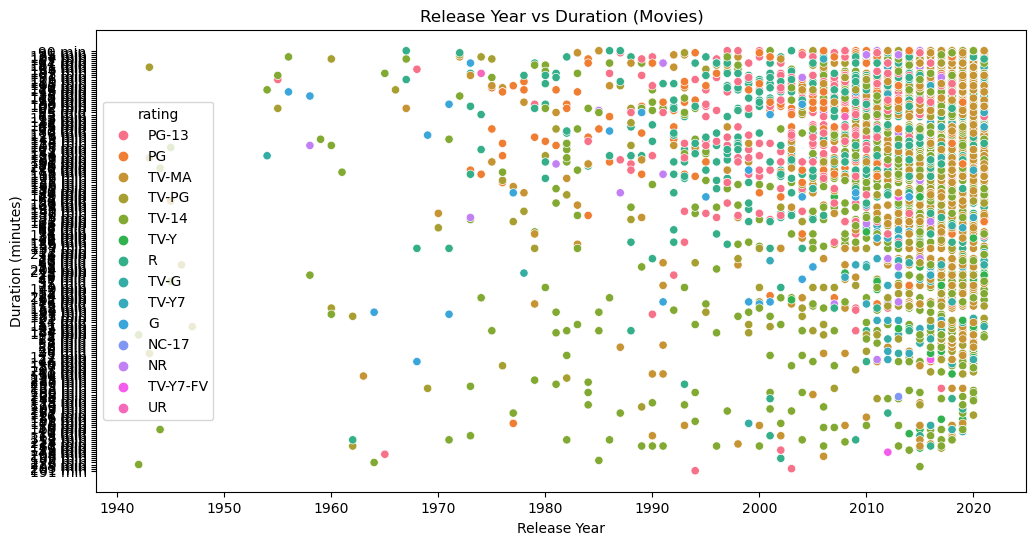

In [186]:
# Scatter plot to explore the relationship between release year and duration for movies
plt.figure(figsize=(12, 6))
sns.scatterplot(x='release_year', y='duration', data=df_cleaned[df_cleaned['type'] == 'Movie'], hue='rating')
plt.title('Release Year vs Duration (Movies)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()


# 8: Advanced Visualizations Using Seaborn

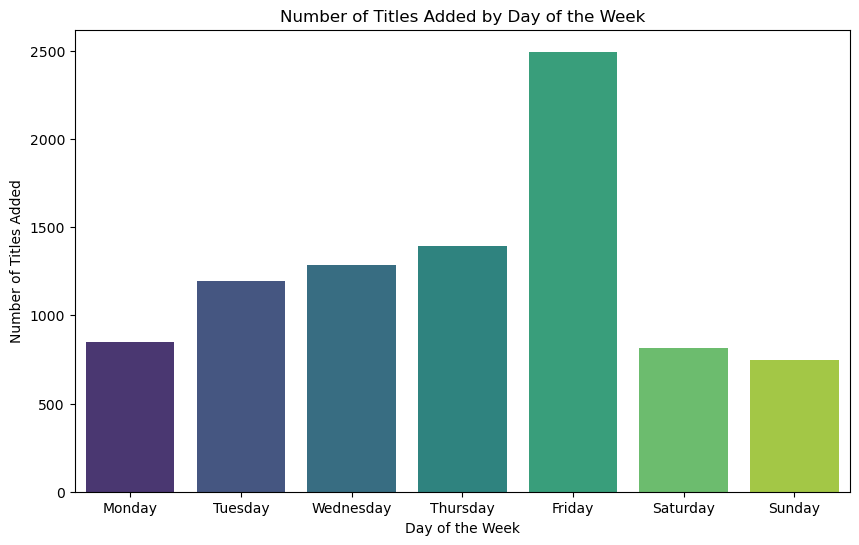

In [195]:
# Convert 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['date_added'].dt.dayofweek

# Map day numbers to day names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(days)

# Count the number of titles added on each day of the week
day_counts = df['day_name'].value_counts().reindex(days.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Number of Titles Added by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles Added')
plt.show()

# Questions:

### 1. Analyze the growth of Movies and TV Shows over the years. Has the addition of new content been consistent, or are there periods of significant increase or decrease?


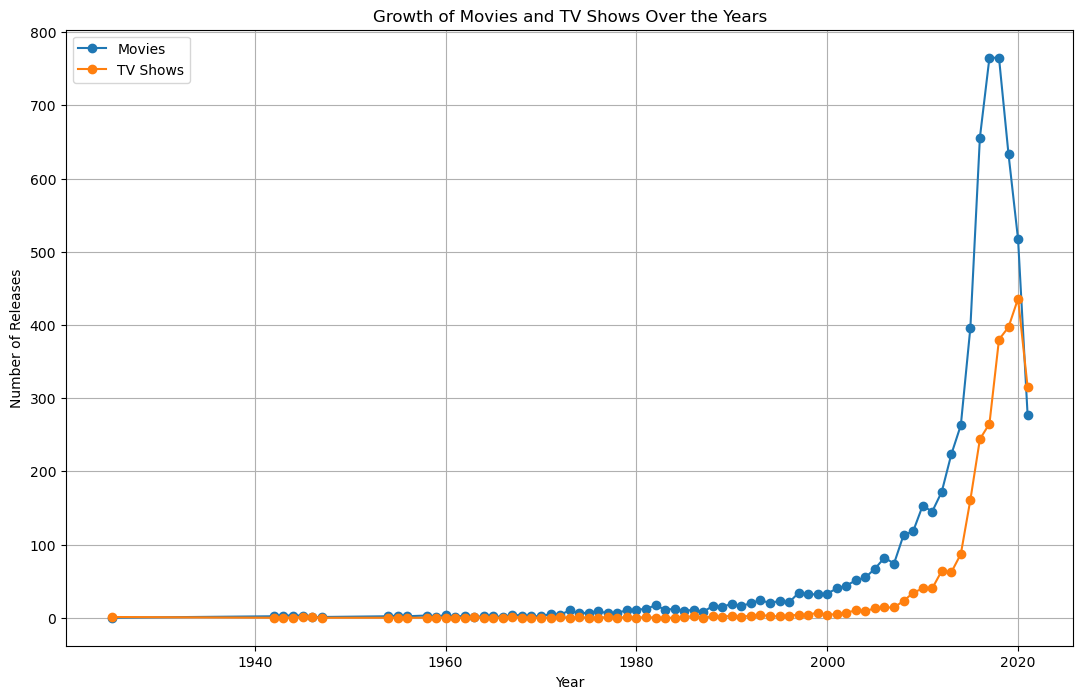

type,Movie,TV Show
release_year,,
1925,0,1
1942,2,0
1943,3,0
1944,3,0
1945,3,1
...,...,...
2017,765,265
2018,765,380
2019,633,397


In [200]:
# Count the number of movies and TV shows per year
yearly_content = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot the trend of content release over the years
plt.figure(figsize=(13, 8))
plt.plot(yearly_content.index, yearly_content['Movie'], label='Movies', marker='o')
plt.plot(yearly_content.index, yearly_content['TV Show'], label='TV Shows', marker='o')
plt.title('Growth of Movies and TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.grid(True)
plt.show()

# Show the yearly_content data to observe any significant periods of change
yearly_content


## 2. Explore the distribution of listed_in genres. Which genres are most prevalent, and is there a difference in genre distribution between Movies and TV Shows?


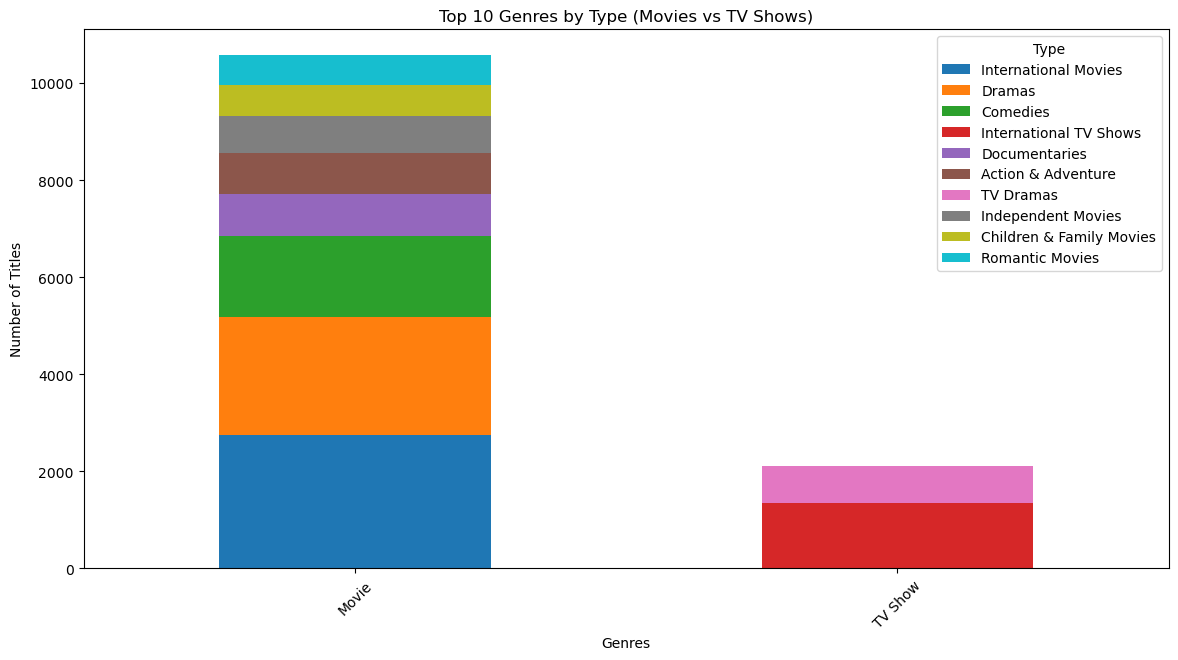

genres,International Movies,Dramas,Comedies,International TV Shows,Documentaries,Action & Adventure,TV Dramas,Independent Movies,Children & Family Movies,Romantic Movies
type,,,,,,,,,,
Movie,2750,2425,1668,0,869,858,0,754,636,616
TV Show,0,0,0,1350,0,0,763,0,0,0


In [204]:
df['genres'] = df['listed_in'].str.split(', ')
genre_data = df.explode('genres')
genre_distribution = genre_data.groupby(['type', 'genres']).size().unstack(fill_value=0)
total_genre_count = genre_distribution.sum(axis=0).sort_values(ascending=False)


# Plot the top 10 genres for Movies and TV Shows
top_genres = total_genre_count.head(10).index
genre_distribution[top_genres].plot(kind='bar', figsize=(14, 7), stacked=True)
plt.title('Top 10 Genres by Type (Movies vs TV Shows)')
plt.xlabel('Genres')
plt.ylabel('Number of Titles')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()

genre_distribution[top_genres]

## 3. Analyze the distribution of content across different country of origin. Are there dominant countries or regions contributing to the Netflix library?


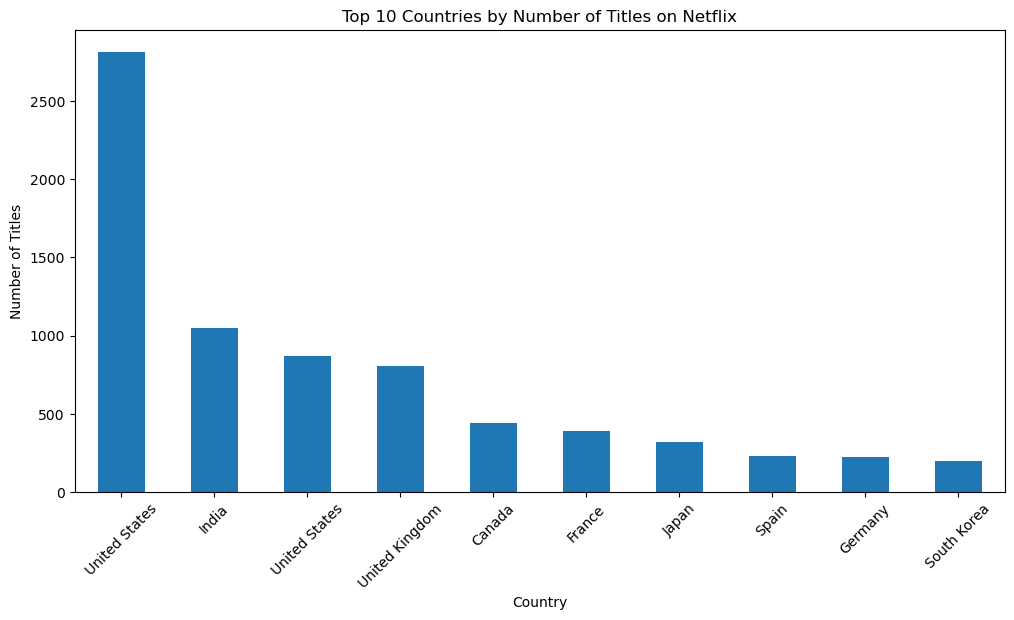

countries
United States     2814
India             1045
United States      870
United Kingdom     804
Canada             443
France             392
Japan              317
Spain              231
Germany            226
South Korea        200
Name: count, dtype: int64

In [208]:
df['countries'] = df['country'].str.split(', ')
country_data = df.explode('countries')

# Count the occurrences of each country for Movies and TV Shows combined
country_distribution = country_data['countries'].value_counts()

# Plot the top 10 countries contributing to the Netflix library
top_countries = country_distribution.head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

top_countries

## 4. Explore the distribution of duration for both Movies and TV Shows. Are there any noticeable trends or differences in content length?


In [212]:
### Separate movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Extract the duration in minutes for movies
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

# Extract the number of seasons for TV shows
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)

C:\Users\manjh\AppData\Local\Temp\ipykernel_13608\4203377581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
C:\Users\manjh\AppData\Local\Temp\ipykernel_13608\4203377581.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


Text(0, 0.5, 'Number of Movies')

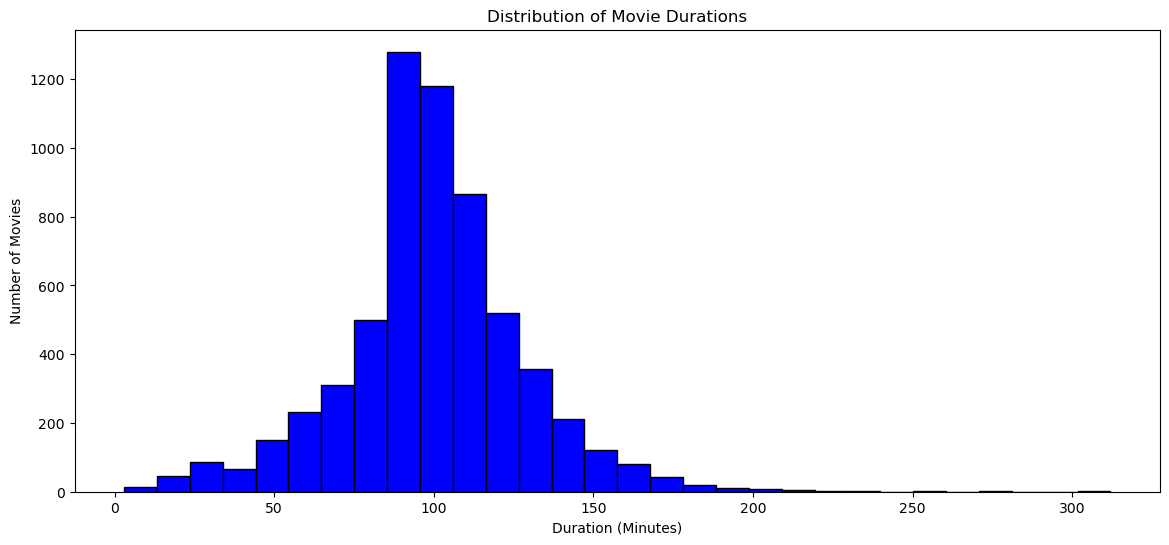

In [214]:
# Plot the distribution of movie durations
plt.figure(figsize=(14, 6))

plt.hist(movies['duration_minutes'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')


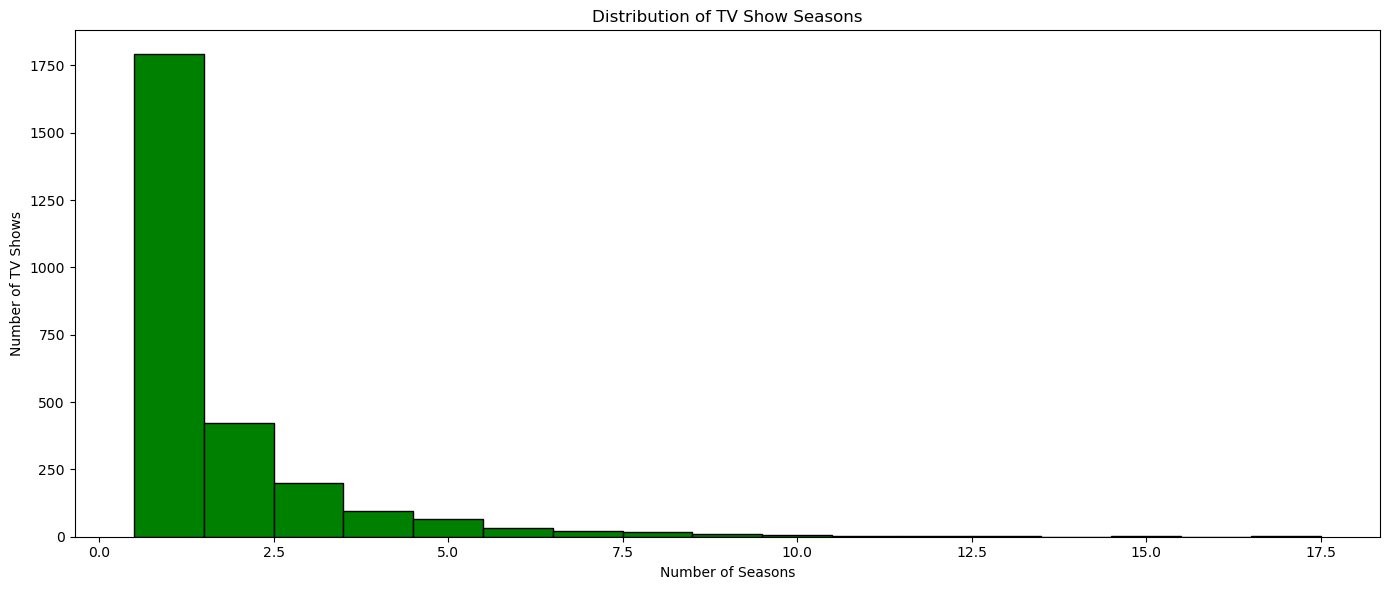

In [216]:

# Plot the distribution of TV show seasons
plt.figure(figsize=(14, 6))
plt.hist(tv_shows['seasons'], bins=np.arange(1, tv_shows['seasons'].max() + 2) - 0.5, color='green', edgecolor='black')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')

plt.tight_layout()
plt.show()

In [218]:
# Display basic statistics to understand trends
movies['duration_minutes'].describe(), tv_shows['seasons'].describe()

(count    6118.000000
 mean       99.597908
 std        28.259109
 min         3.000000
 25%        87.000000
 50%        98.000000
 75%       114.000000
 max       312.000000
 Name: duration_minutes, dtype: float64,
 count    2673.000000
 mean        1.765432
 std         1.583495
 min         1.000000
 25%         1.000000
 50%         1.000000
 75%         2.000000
 max        17.000000
 Name: seasons, dtype: float64)

## 5. Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?


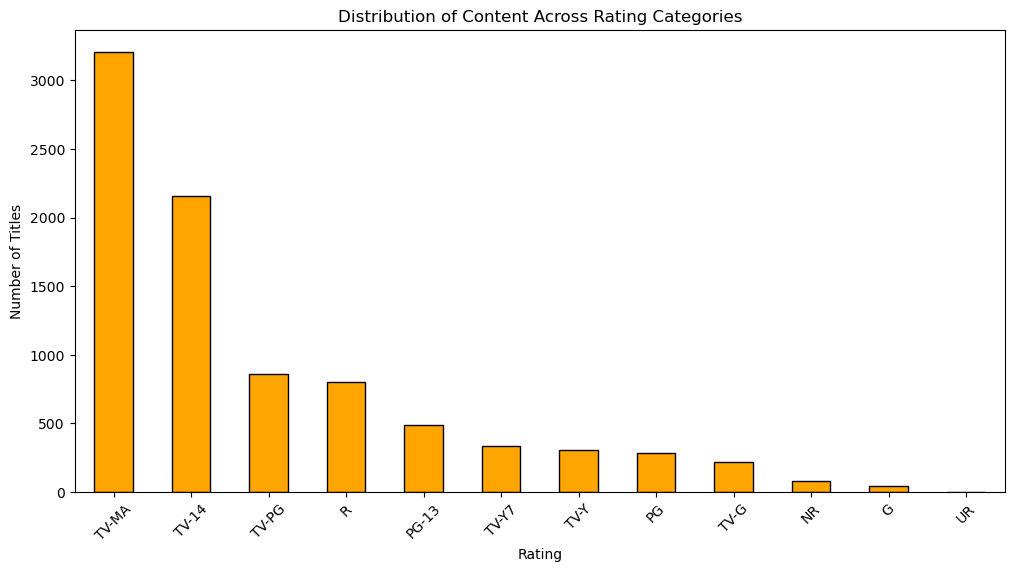

In [222]:
# Count the number of titles in each rating category
rating_distribution = df['rating'].value_counts()

# Plot the distribution of rating categories
plt.figure(figsize=(12, 6))
rating_distribution.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of Content Across Rating Categories')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()



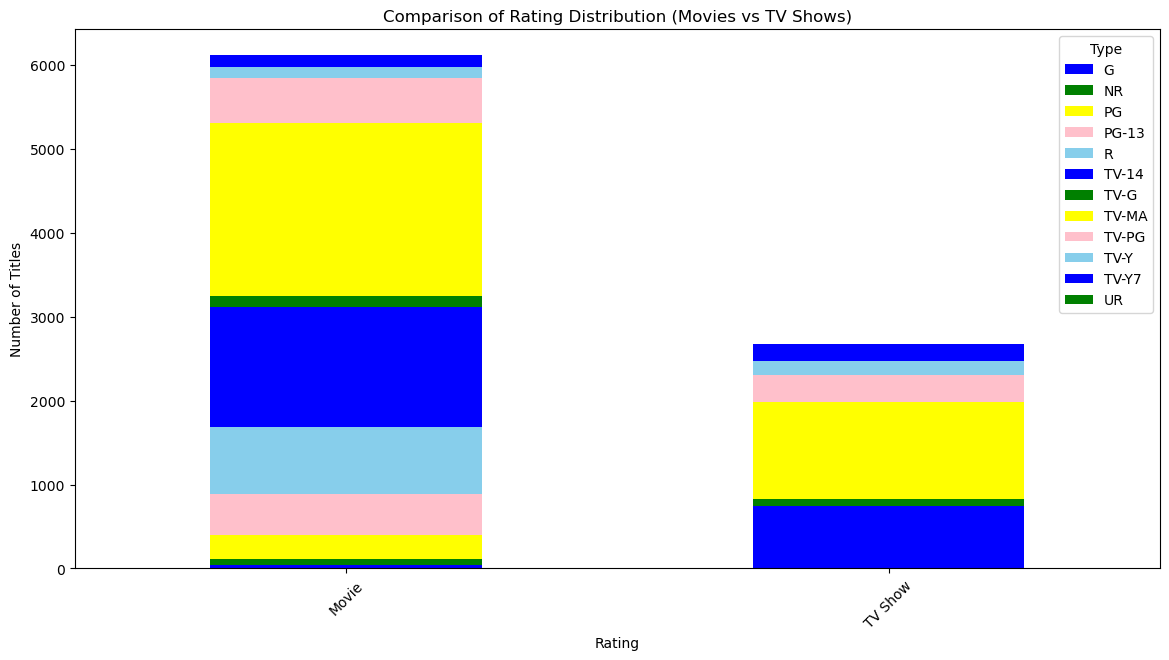

In [224]:
# If you want to compare between Movies and TV Shows
rating_distribution_by_type = df.groupby(['type', 'rating']).size().unstack(fill_value=0)

# Plot the comparison
rating_distribution_by_type.plot(kind='bar', stacked=True, figsize=(14, 7), color=['blue', 'green', 'yellow','pink', 'skyblue'])
plt.title('Comparison of Rating Distribution (Movies vs TV Shows)')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


## 6. Investigate the number of titles released each year (release_year). Are there any patterns or significant changes in the volume of releases over time?


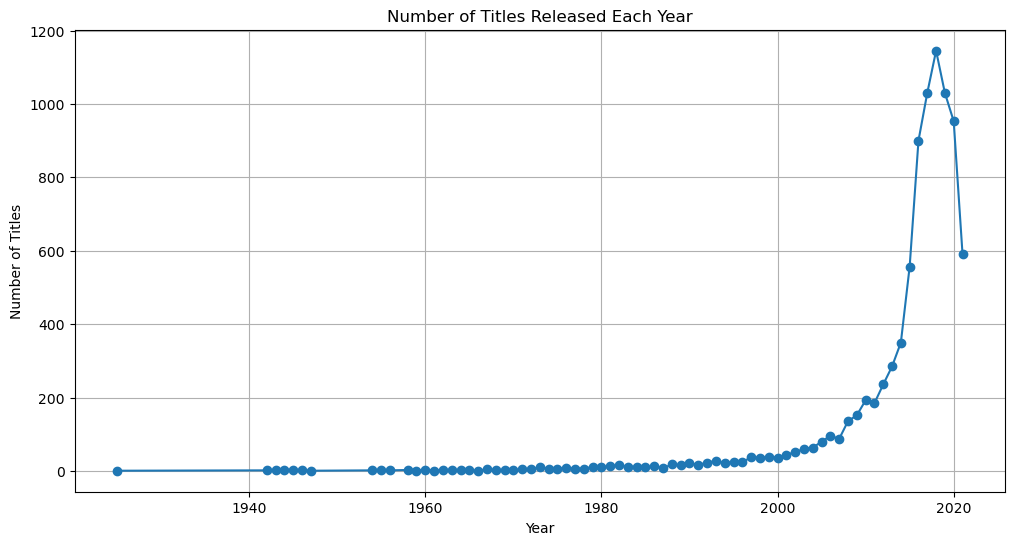

count      74.000000
mean      118.797297
std       266.575337
min         1.000000
25%         3.000000
50%        12.500000
75%        58.500000
max      1145.000000
Name: count, dtype: float64

In [228]:
release_year_distribution = df['release_year'].value_counts().sort_index()

# Plot the number of titles released each year
plt.figure(figsize=(12, 6))
plt.plot(release_year_distribution.index, release_year_distribution.values, marker='o')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

release_year_distribution.describe()

## 7. Analyze the distribution of content added to Netflix over different months or quarters. Are there periods with higher content addition activity?


In [233]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['quarter_added'] = df['date_added'].dt.quarter

# number of titles added each month
monthly_addition = df['month_added'].value_counts().sort_index()
# number of titles added each quarter
quarterly_addition = df['quarter_added'].value_counts().sort_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0')])

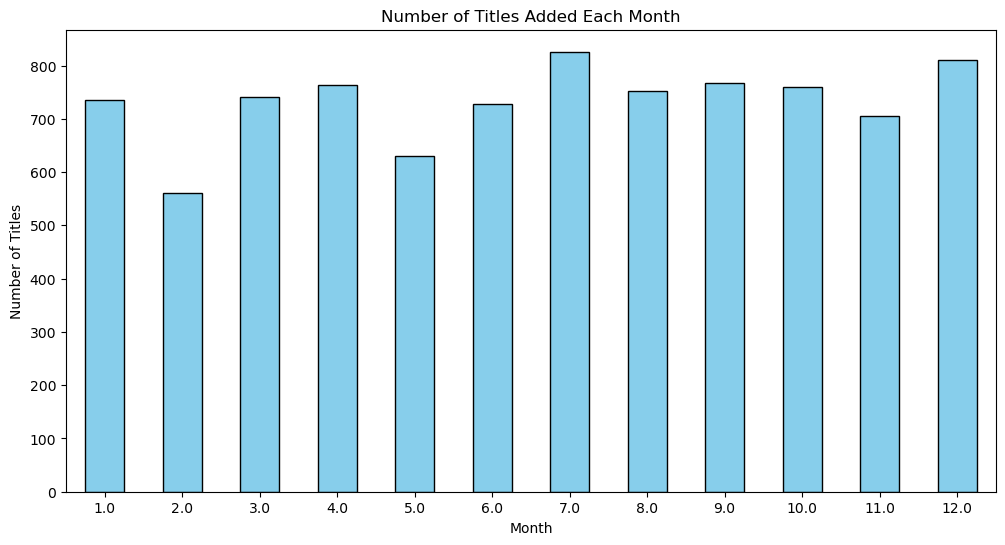

In [235]:
# Plot the monthly addition of content
plt.figure(figsize=(12, 6))

monthly_addition.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Titles Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)

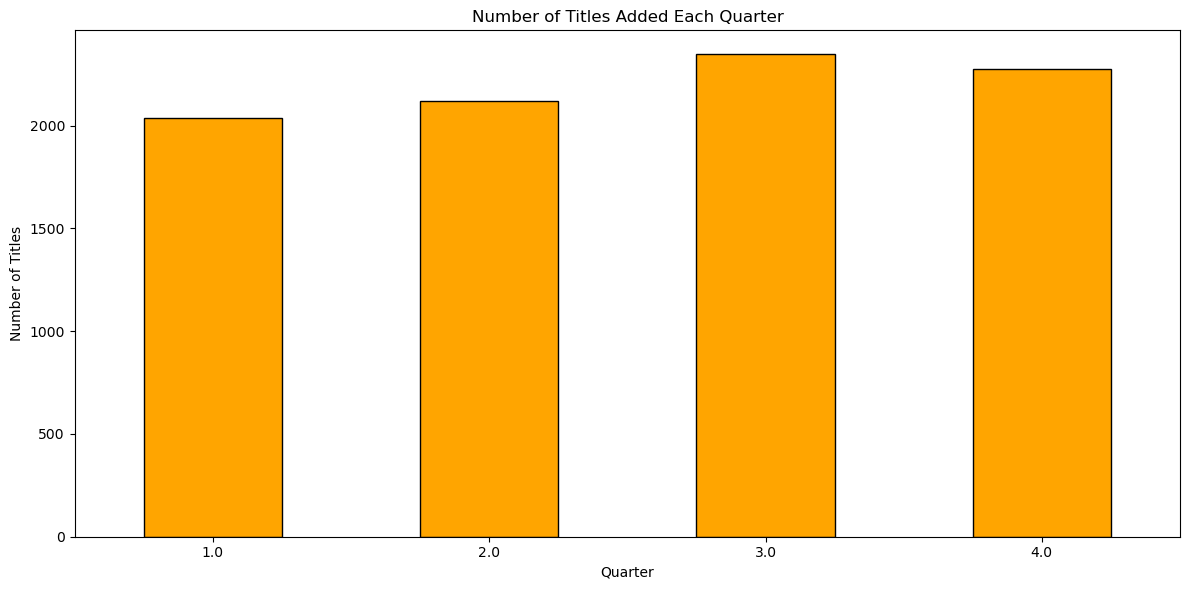

(count     12.000000
 mean     731.750000
 std       73.254382
 min      560.000000
 25%      722.250000
 50%      747.000000
 75%      764.250000
 max      826.000000
 Name: count, dtype: float64,
 count       4.000000
 mean     2195.250000
 std       141.181621
 min      2037.000000
 25%      2100.750000
 50%      2198.500000
 75%      2293.000000
 max      2347.000000
 Name: count, dtype: float64)

In [237]:
# Plot the quarterly addition of content
plt.figure(figsize=(12, 6))
quarterly_addition.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Number of Titles Added Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Display basic statistics to understand trends
monthly_addition.describe(), quarterly_addition.describe()

## 8. Explore whether there are any patterns in the date_added for new content in terms of specific days of the week.


In [248]:
# Convert the 'date_added' column to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
# Extract the day of the week (Monday=0, Sunday=6)
df['day_of_week'] = df['date_added'].dt.dayofweek

# Map the day_of_week to actual names of the days
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

# Count the number of titles added on each day of the week
day_of_week_distribution = df['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

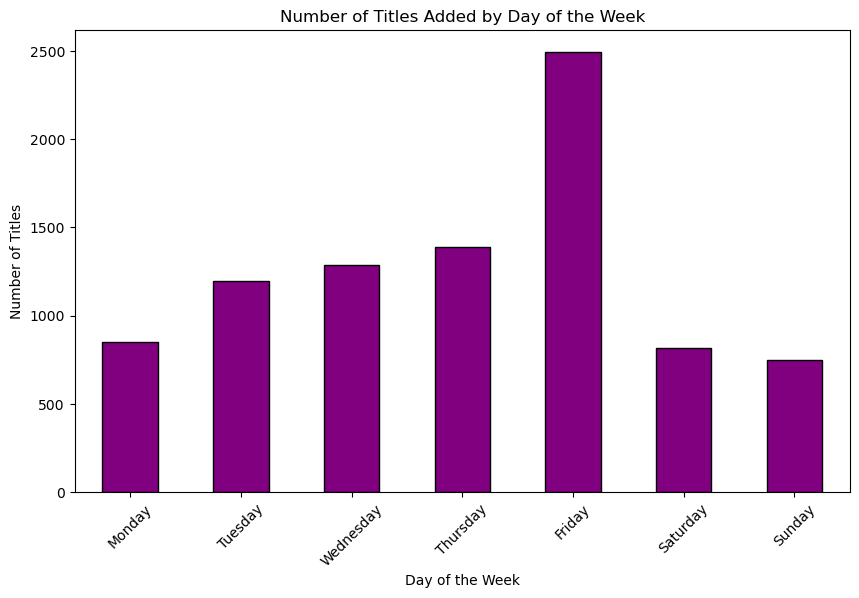

day_of_week
Monday        850
Tuesday      1196
Wednesday    1287
Thursday     1391
Friday       2494
Saturday      815
Sunday        748
Name: count, dtype: int64

In [250]:
# Plot the distribution of content added by day of the week
plt.figure(figsize=(10, 6))
day_of_week_distribution.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Number of Titles Added by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Display the distribution data
day_of_week_distribution


## 9. Identify the most frequent directors on the platform and explore the distribution of their content across different genres and rating categories.


In [252]:
# Identify the most frequent directors by counting their appearances
director_counts = df['director'].value_counts().head(10)
# Filter the data to include only the most frequent directors
top_directors = df[df['director'].isin(director_counts.index)]
# Analyze genre distribution for the top directors
genre_distribution = top_directors.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

# Analyze rating distribution for the top directors
rating_distribution = top_directors.groupby(['director', 'rating']).size().unstack(fill_value=0)

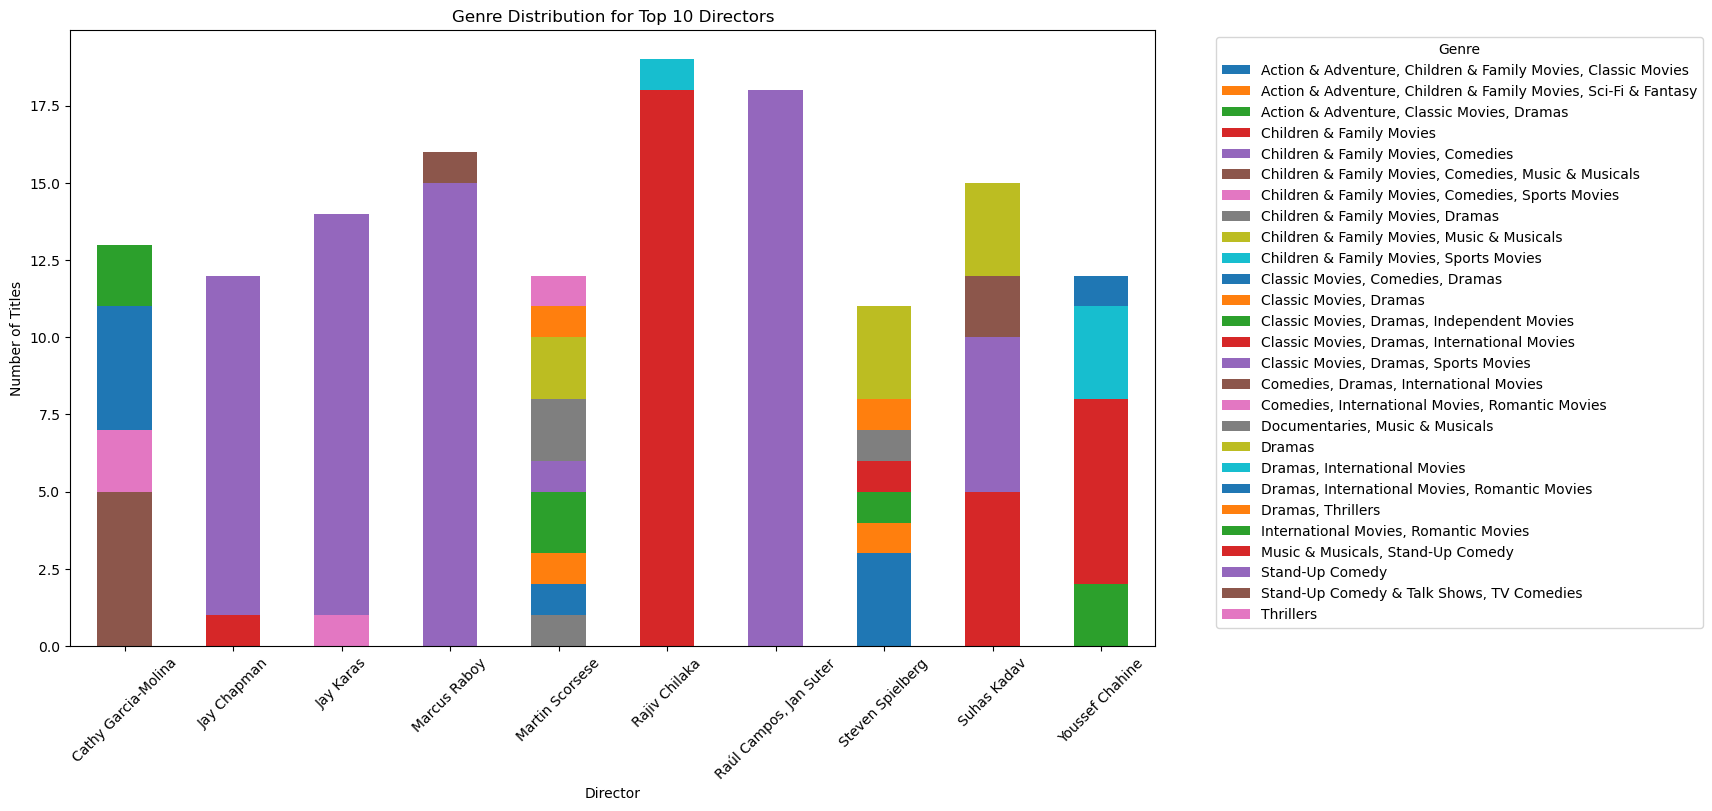

In [254]:
# Plot the genre distribution for the most frequent directors
genre_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Genre Distribution for Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

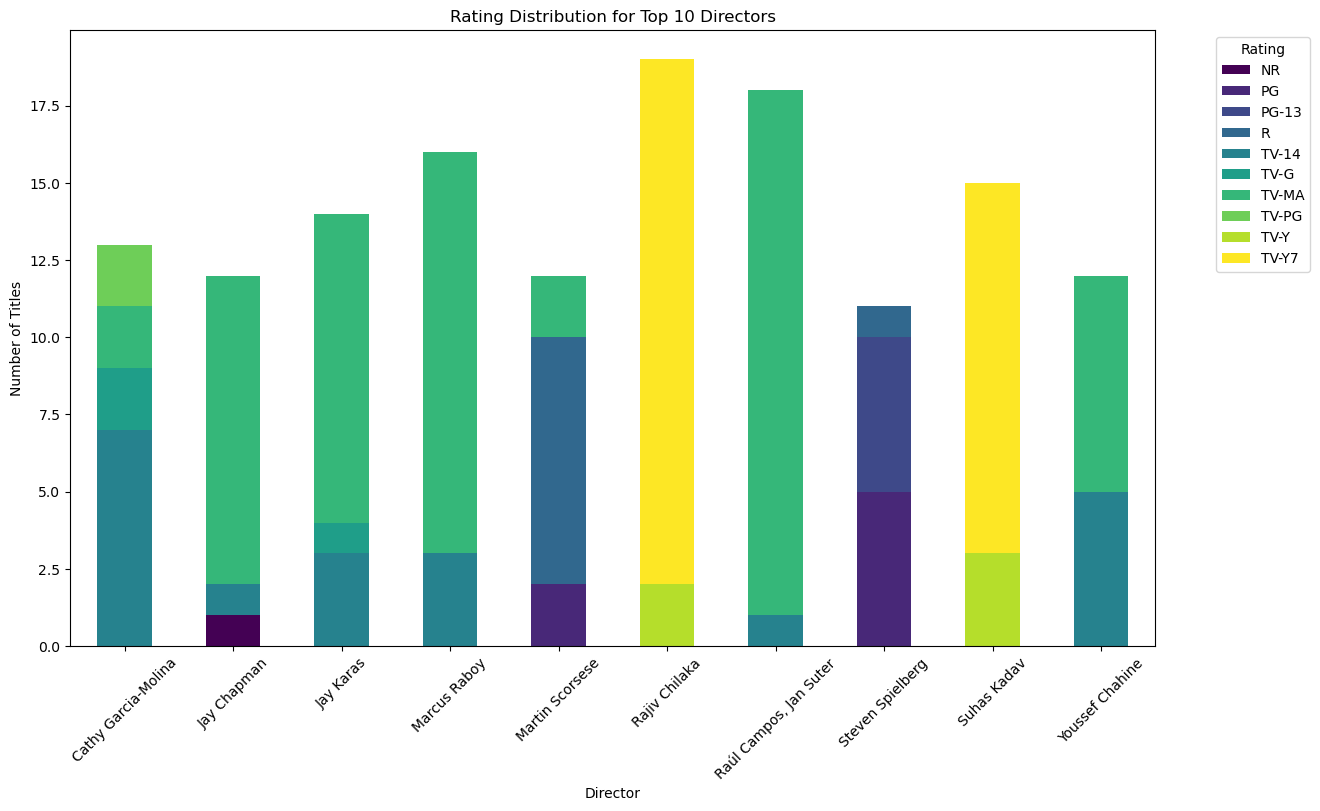

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               15
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [256]:
# Plot the rating distribution for the most frequent directors
rating_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Rating Distribution for Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the top directors and their content counts
director_counts

## 10. Analyze the most frequent cast members and their involvement in different genres and content types. Do certain actors appear predominantly in specific genres or types of content?


In [258]:
# Split the 'cast' column by commas and explode the dataframe to have one cast member per row
df['cast'] = df['cast'].fillna('')
data_exploded = df.assign(cast=df['cast'].str.split(', ')).explode('cast')
# Identify the most frequent cast members by counting their appearances
cast_counts = data_exploded['cast'].value_counts().head(10)
# Filter the data to include only the most frequent cast members
top_cast = data_exploded[data_exploded['cast'].isin(cast_counts.index)]
# Analyze genre involvement for the top cast members
genre_distribution = top_cast.groupby(['cast', 'listed_in']).size().unstack(fill_value=0)
# Analyze content type involvement (Movies vs TV Shows) for the top cast members
content_type_distribution = top_cast.groupby(['cast', 'type']).size().unstack(fill_value=0)

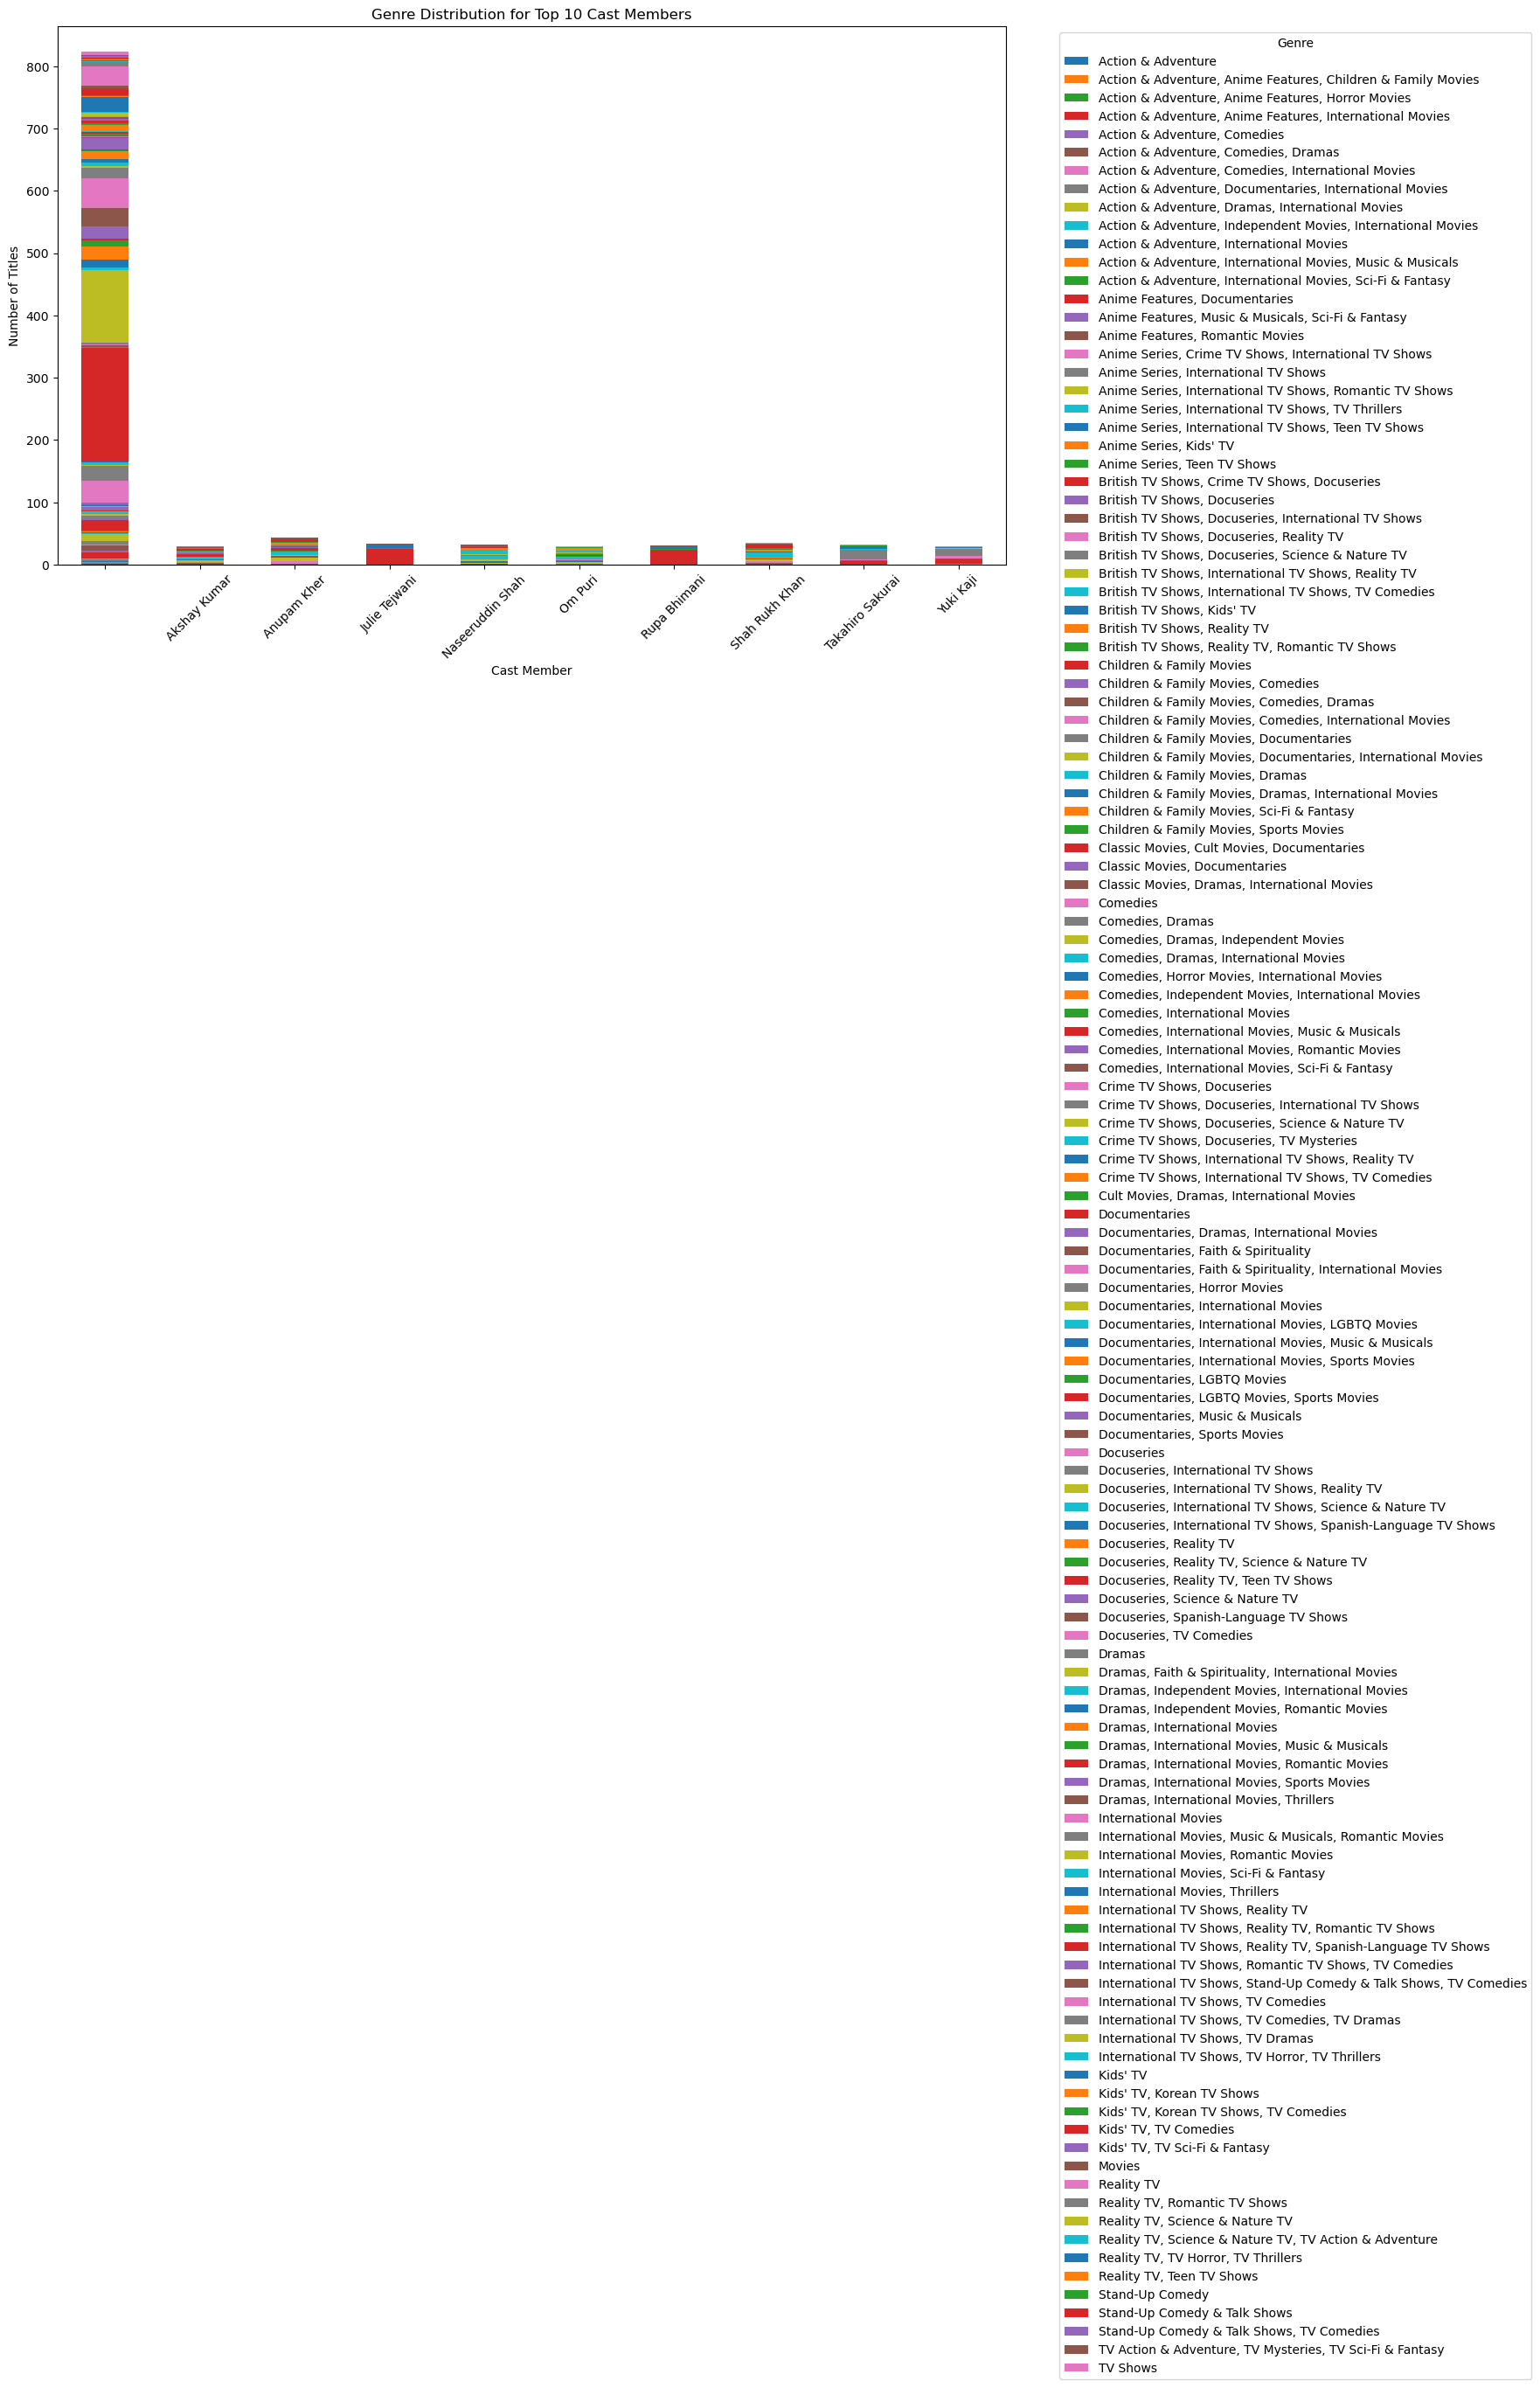

In [260]:
# Plot the genre distribution for the most frequent cast members
genre_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Genre Distribution for Top 10 Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

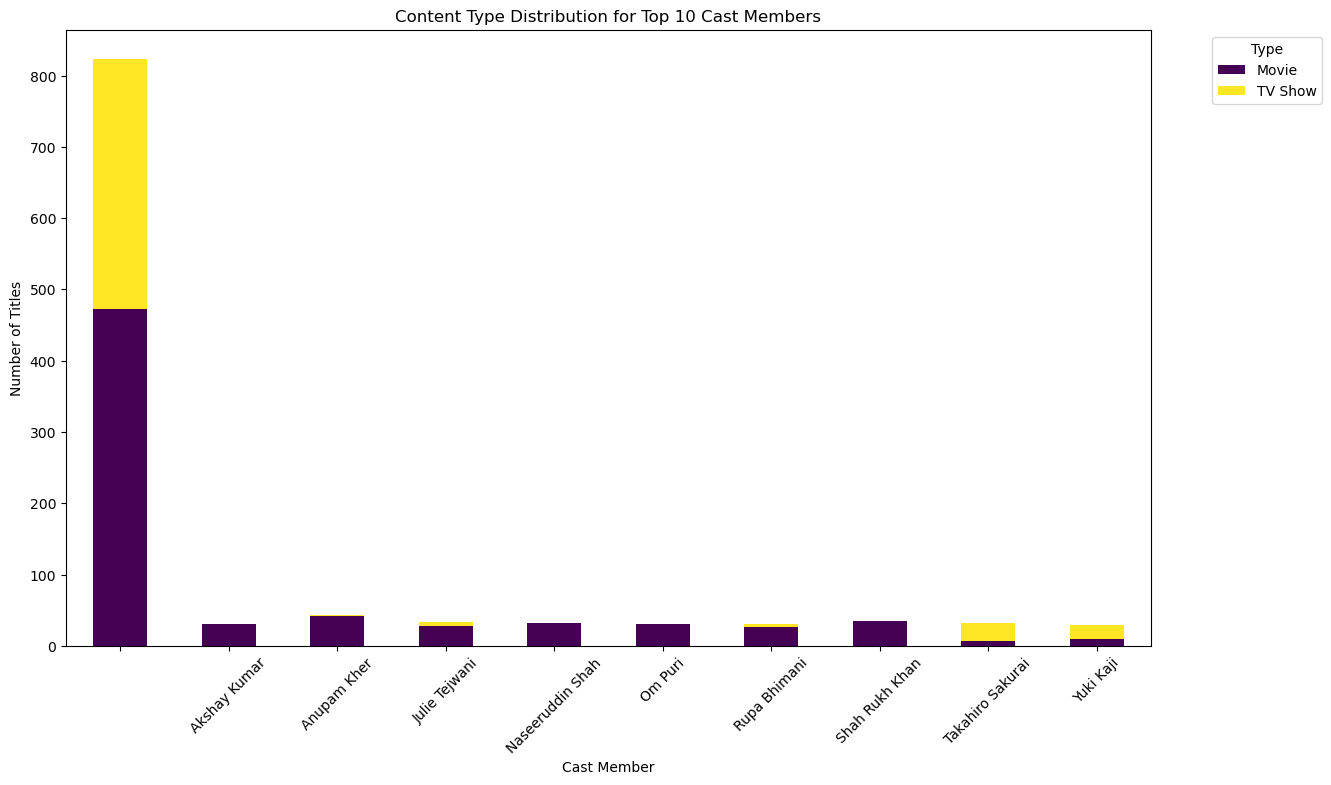

cast
                    823
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Name: count, dtype: int64

In [261]:
# Plot the content type distribution (Movies vs TV Shows) for the most frequent cast members
content_type_distribution.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Content Type Distribution for Top 10 Cast Members')
plt.xlabel('Cast Member')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display the top cast members and their content counts
cast_counts

## 11. Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years?


In [264]:
# Split the 'listed_in' column into a list of genres
df['genres'] = df['listed_in'].str.split(', ')

# Explode the 'genres' column to have one genre per row
exploded_data = df.explode('genres')

# Group by 'release_year' and 'genres' to count the number of titles per genre each year
genre_trends = exploded_data.groupby(['release_year', 'genres']).size().reset_index(name='count')

# Pivot the data to make it suitable for plotting
genre_pivot = genre_trends.pivot(index='release_year', columns='genres', values='count').fillna(0)

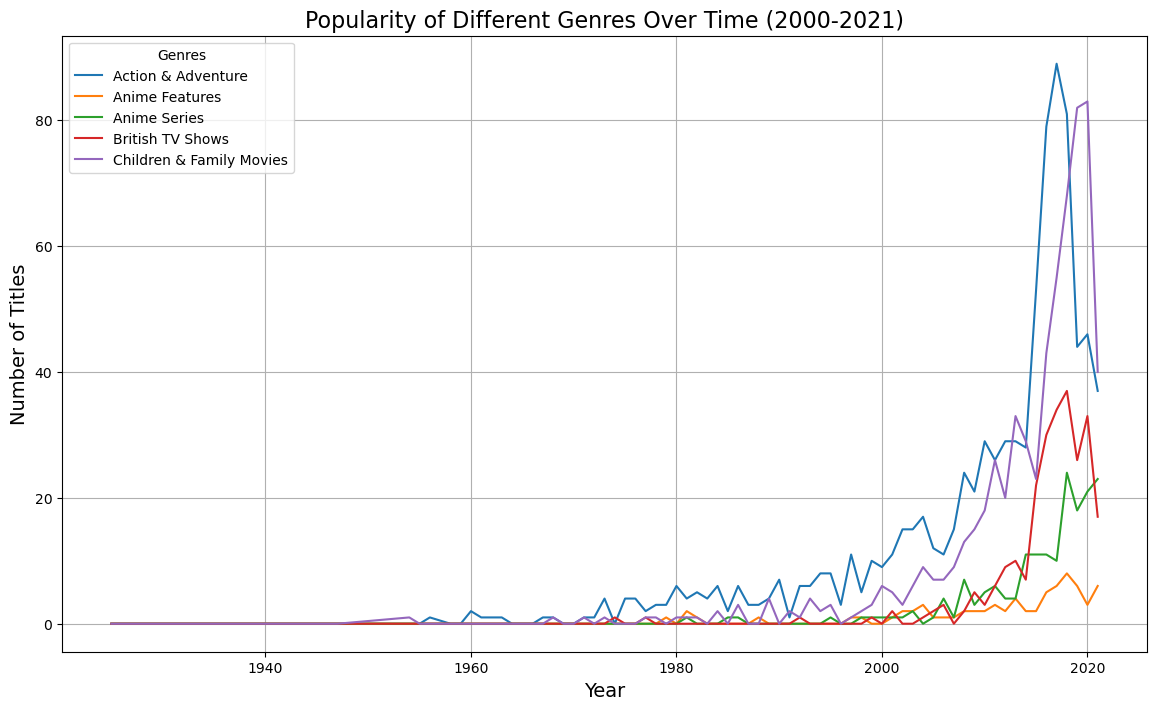

In [266]:

plt.figure(figsize=(14, 8))
for genre in genre_pivot.columns[:5]:  # Plot the first 5 genres for simplicity
    plt.plot(genre_pivot.index, genre_pivot[genre], label=genre)

plt.title('Popularity of Different Genres Over Time (2000-2021)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Titles', fontsize=14)
plt.legend(title='Genres')
plt.grid(True)
plt.show()

## 12. Explore any potential relationship between content duration and its average rating. Do longer or shorter movies/shows tend to receive higher or lower ratings?


In [274]:

# Separate movies and TV shows
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

In [278]:
# Extract duration in minutes
movies['duration_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)
# Extract the number of seasons
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


In [280]:
# Convert ratings to a numeric scale
rating_scale = {
    'TV-MA': 18, 'R': 17, 'TV-14': 14, 'PG-13': 13,
    'TV-PG': 10, 'PG': 10, 'TV-Y7': 7, 'G': 7, 
    'TV-Y': 3, 'TV-G': 3, 'NR': 0, 'UR': 0
}

movies['numeric_rating'] = movies['rating'].map(rating_scale)
tv_shows['numeric_rating'] = tv_shows['rating'].map(rating_scale)


Correlation between movie duration and rating: 0.18650122776222278
Correlation between TV show seasons and rating: -0.04711411367535735


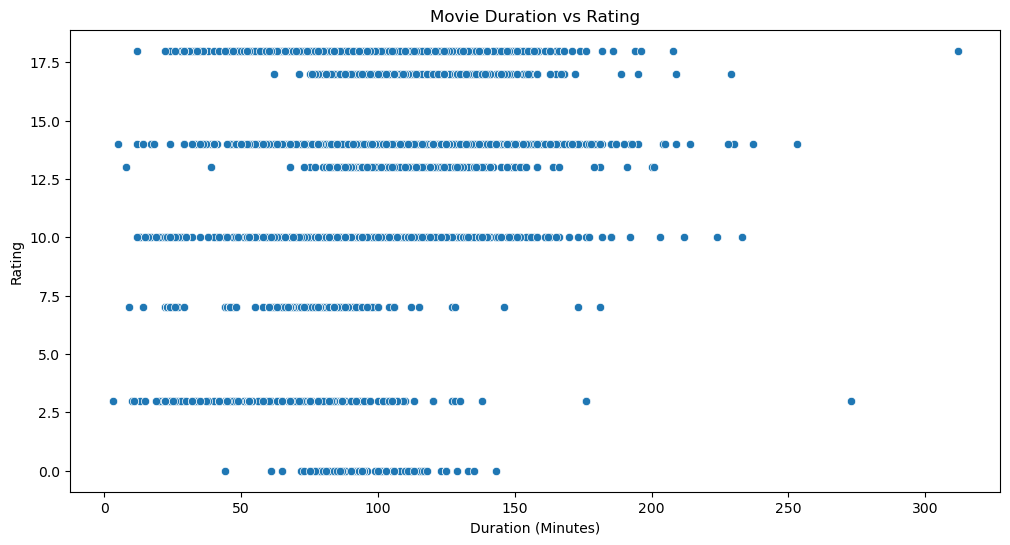

In [282]:
# Calculate correlation for movies
movie_corr = movies[['duration_minutes', 'numeric_rating']].corr().iloc[0, 1]

# Calculate correlation for TV shows
tv_corr = tv_shows[['seasons', 'numeric_rating']].corr().iloc[0, 1]

print(f"Correlation between movie duration and rating: {movie_corr}")
print(f"Correlation between TV show seasons and rating: {tv_corr}")

# Visualize the relationship for movies
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration_minutes', y='numeric_rating', data=movies)
plt.title('Movie Duration vs Rating')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Rating')
plt.show()


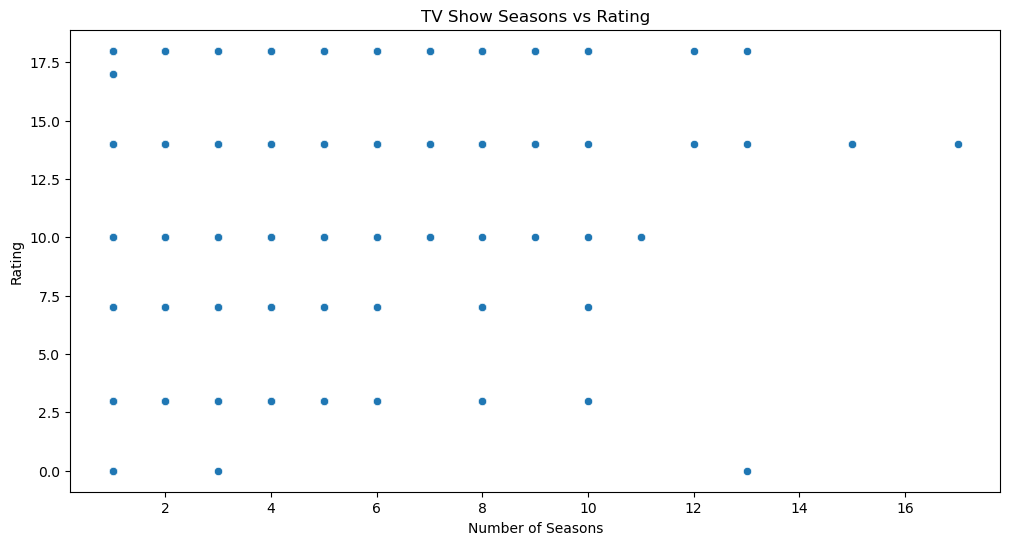

In [284]:
# Visualize the relationship for TV shows
plt.figure(figsize=(12, 6))
sns.scatterplot(x='seasons', y='numeric_rating', data=tv_shows)
plt.title('TV Show Seasons vs Rating')
plt.xlabel('Number of Seasons')
plt.ylabel('Rating')
plt.show()

## 13. Analyze whether there is any correlation between the content rating and the country of origin. Do certain countries produce content with specific rating tendencies?


In [288]:
# Clean the dataset by dropping rows with missing 'country' or 'rating'
df_cleaned = df.dropna(subset=['country', 'rating'])

# Analyze the distribution of ratings per country
rating_distribution = df_cleaned.groupby(['country', 'rating']).size().unstack(fill_value=0)

# Display the distribution to identify patterns
rating_distribution.head(10)  # Show the first 10 countries for brevity


rating,G,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
country,,,,,,,,,,,,
", France, Algeria",0,0,0,0,0,1,0,0,0,0,0,0
Argentina,0,2,0,0,1,7,2,39,3,2,0,0
"Argentina, Brazil, France, Poland, Germany, Denmark",0,0,0,0,0,1,0,0,0,0,0,0
"Argentina, Chile",0,0,0,0,0,1,0,1,0,0,0,0
"Argentina, Chile, Peru",0,0,0,0,0,0,0,1,0,0,0,0
"Argentina, France",0,0,0,0,0,0,0,1,0,0,0,0
"Argentina, France, United States, Germany, Qatar",0,0,0,0,0,0,0,1,0,0,0,0
"Argentina, Italy",0,0,0,0,0,0,0,1,0,0,0,0
"Argentina, Spain",0,0,1,0,0,0,0,7,0,0,0,0


In [290]:
# Split entries with multiple countries and expand the DataFrame
df_expanded = df_cleaned.assign(country=df_cleaned['country'].str.split(', ')).explode('country')

# Recalculate the distribution of ratings per country
rating_distribution_expanded = df_expanded.groupby(['country', 'rating']).size().unstack(fill_value=0)

# Display the updated distribution
rating_distribution_expanded.head(10)  # Show the first 10 countries for brevity


rating,G,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,UR
country,,,,,,,,,,,,
,0,0,0,0,0,1,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,1,0,0,0,0
Albania,0,0,0,0,0,0,0,1,0,0,0,0
Algeria,0,0,0,0,0,1,0,2,0,0,0,0
Angola,0,0,0,0,0,0,0,1,0,0,0,0
Argentina,1,2,1,0,2,10,2,67,4,2,0,0
Armenia,0,0,0,0,0,0,0,1,0,0,0,0
Australia,0,3,13,11,21,21,6,44,19,12,9,0
Austria,0,0,0,0,1,2,0,6,3,0,0,0


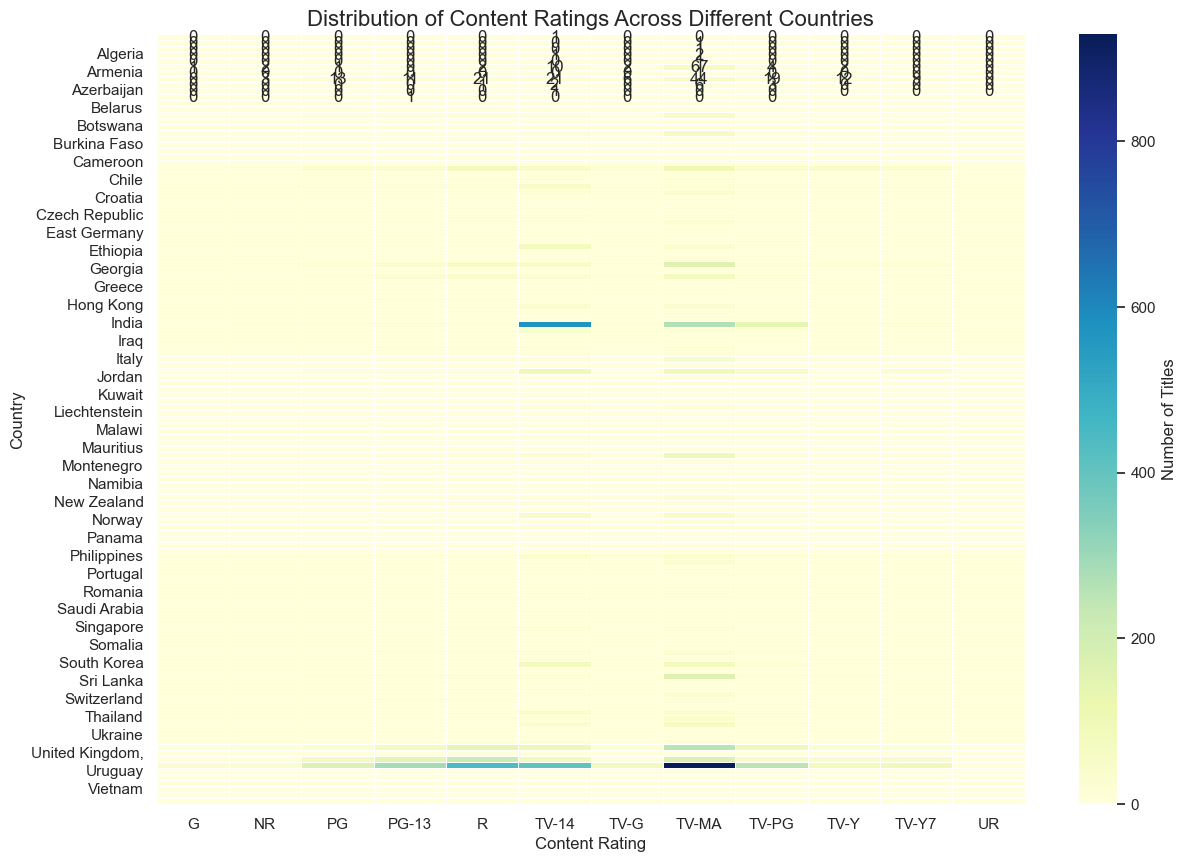

In [292]:
# Set the plot size and style
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Plot the heatmap of content ratings distribution across countries
sns.heatmap(rating_distribution_expanded, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d", cbar_kws={'label': 'Number of Titles'})

# Set plot labels and title
plt.title("Distribution of Content Ratings Across Different Countries", fontsize=16)
plt.xlabel("Content Rating", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Display the plot
plt.show()

## 14. Explore whether specific directors are associated with particular genres or content types.


In [296]:
# Clean the dataset by removing rows with missing 'director' or 'listed_in' (which contains genres)
df_directors = df.dropna(subset=['director', 'listed_in'])

# Create a DataFrame that associates each director with their genres
director_genre_association = df_directors.groupby('director')['listed_in'].apply(lambda x: ', '.join(x)).reset_index()

# Split the genres into a list and explode the DataFrame to analyze the associations
director_genre_association['listed_in'] = director_genre_association['listed_in'].str.split(', ')
df_exploded = director_genre_association.explode('listed_in')

# Count the number of times each director is associated with each genre
director_genre_counts = df_exploded.groupby(['director', 'listed_in']).size().unstack(fill_value=0)

# Display the top associations
top_director_genres = director_genre_counts.stack().reset_index(name='count')
top_director_genres = top_director_genres.sort_values(by='count', ascending=False)

# Show the top 10 directors and their associated genres
print(top_director_genres.head(10))

                      director                 listed_in  count
142300           Rajiv Chilaka  Children & Family Movies     19
144468  Raúl Campos, Jan Suter           Stand-Up Comedy     18
169768             Suhas Kadav  Children & Family Movies     15
109020            Marcus Raboy           Stand-Up Comedy     15
28702      Cathy Garcia-Molina      International Movies     13
75126                Jay Karas           Stand-Up Comedy     13
75000              Jay Chapman           Stand-Up Comedy     12
188004         Youssef Chahine                    Dramas     12
188008         Youssef Chahine      International Movies     10
28698      Cathy Garcia-Molina                    Dramas      9


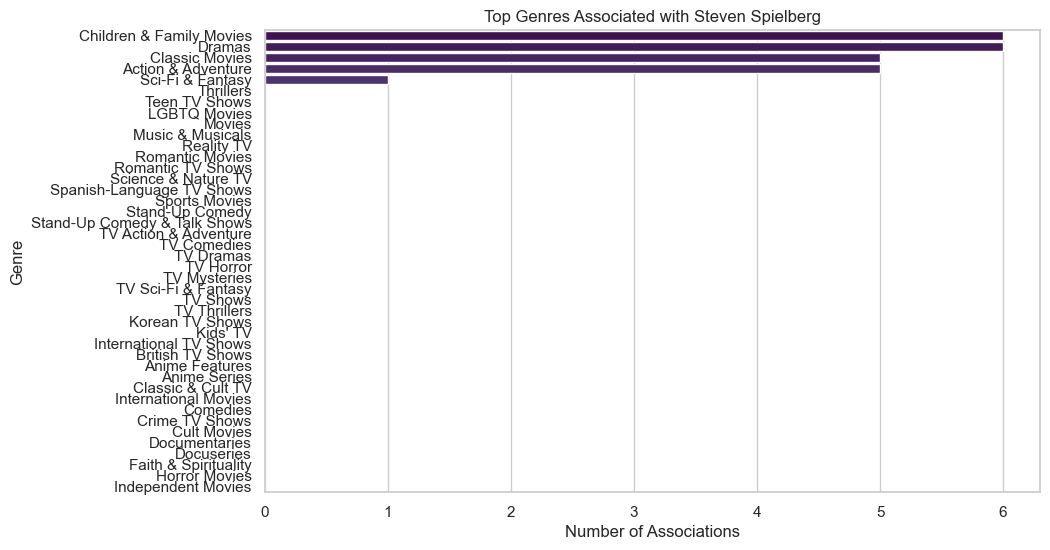

In [298]:
# Example: Top genres associated with a specific director
specific_director = 'Steven Spielberg'
director_genre_subset = top_director_genres[top_director_genres['director'] == specific_director]
# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='listed_in', data=director_genre_subset, palette='viridis')
plt.title(f'Top Genres Associated with {specific_director}')
plt.xlabel('Number of Associations')
plt.ylabel('Genre')
plt.show()

## 15. Analyze whether certain cast members tend to appear more frequently in specific genres or content types.


In [302]:

# Clean the dataset by removing rows with missing 'cast' or 'listed_in'
df_cast = df.dropna(subset=['cast', 'listed_in']).copy()

# Split the 'cast' and 'listed_in' columns into individual entries using .loc to avoid SettingWithCopyWarning
df_cast.loc[:, 'cast'] = df_cast['cast'].str.split(', ')
df_cast.loc[:, 'listed_in'] = df_cast['listed_in'].str.split(', ')

# Explode the DataFrame to have one row per cast member and genre
df_exploded = df_cast.explode('cast').explode('listed_in')

# Count the number of times each cast member appears in each genre
cast_genre_counts = df_exploded.groupby(['cast', 'listed_in']).size().unstack(fill_value=0)

# Sort the results to find the top associations
top_cast_genres = cast_genre_counts.stack().reset_index(name='count')
top_cast_genres = top_cast_genres.sort_values(by='count', ascending=False)

# Show the top 10 cast members and their associated genres
print(top_cast_genres.head(10))

               cast               listed_in  count
10                            Documentaries    424
11                               Docuseries    207
16                     International Movies    178
17                   International TV Shows    109
23                               Reality TV     92
8                            Crime TV Shows     75
29                            Sports Movies     54
3                          British TV Shows     45
18                                 Kids' TV     42
118624  Anupam Kher    International Movies     38


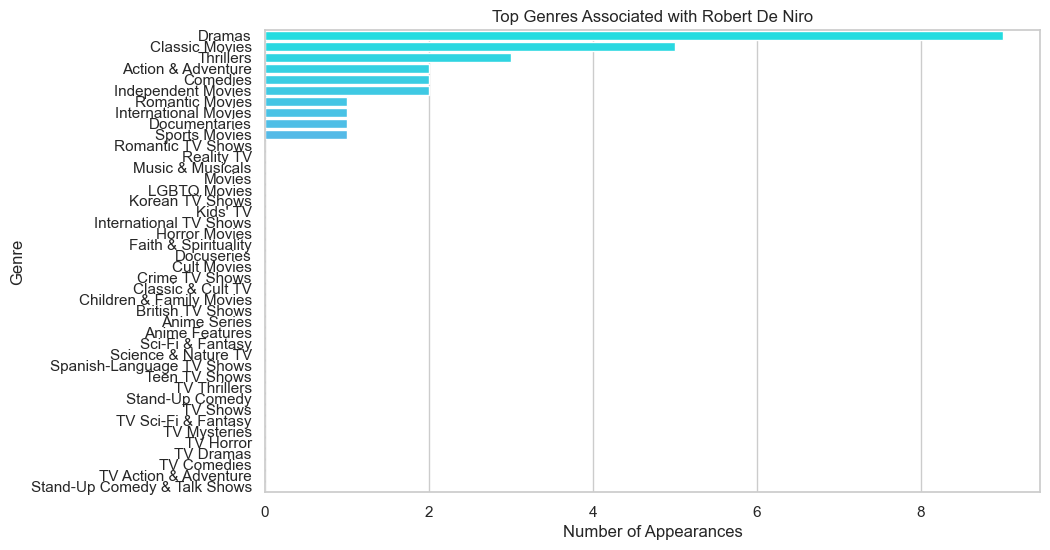

In [304]:
# Example: Top genres associated with a specific cast member
specific_cast_member = 'Robert De Niro'
cast_genre_subset = top_cast_genres[top_cast_genres['cast'] == specific_cast_member]

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='listed_in', data=cast_genre_subset, palette='cool')
plt.title(f'Top Genres Associated with {specific_cast_member}')
plt.xlabel('Number of Appearances')
plt.ylabel('Genre')
plt.show()


## 16. Analyze the co-occurrence of different genres within the listed_in category. Are there genres that frequently appear together, suggesting potential hybrid genres or subgenres?


In [309]:
from collections import Counter 
from itertools import combinations  

In [311]:
# Split the 'listed_in' column into a list of genres for each entry
df['genre_list'] = df['listed_in'].str.split(', ')

# Count co-occurrences of genres
genre_combinations = Counter()

for genres in df['genre_list']:
    if len(genres) > 1:
        genre_combinations.update(combinations(genres, 2))

# Convert the counter to a DataFrame for easier analysis
genre_combinations_df = pd.DataFrame(genre_combinations.items(), columns=['Genre Pair', 'Count']).sort_values(by='Count', ascending=False)

# Display the top 10 co-occurring genres
print(genre_combinations_df.head(10))

                                     Genre Pair  Count
13               (Dramas, International Movies)   1482
30             (Comedies, International Movies)    803
12                 (Dramas, Independent Movies)    587
0           (International TV Shows, TV Dramas)    514
16                           (Comedies, Dramas)    502
44   (Action & Adventure, International Movies)    398
32      (International Movies, Romantic Movies)    372
7   (International TV Shows, Romantic TV Shows)    315
66                    (Dramas, Romantic Movies)    308
3      (Crime TV Shows, International TV Shows)    299


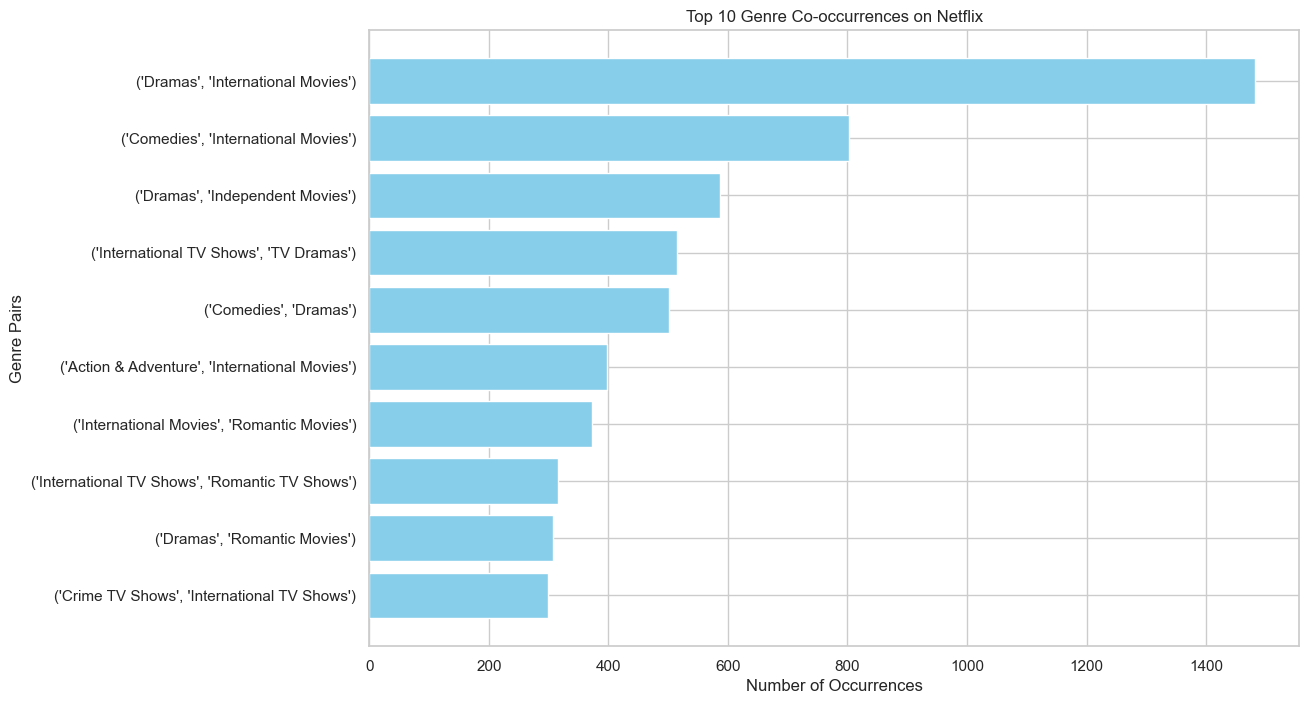

In [313]:
# Select the top 10 genre pairs for visualization
top_genre_combinations = genre_combinations_df.head(10)

# Plotting the top genre co-occurrences
plt.figure(figsize=(12, 8))
plt.barh(top_genre_combinations['Genre Pair'].astype(str), top_genre_combinations['Count'], color='skyblue')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genre Pairs')
plt.title('Top 10 Genre Co-occurrences on Netflix')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()


## 17. Explore how the themes or topics of content have evolved over time based on the analysis of titles and descriptions. Are there noticeable shifts in the types of stories being told?


In [317]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [319]:
# Extract relevant columns
df = df[['title', 'release_year', 'description']].dropna()
df['description_clean'] = df['description'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['description_clean'])

In [321]:
# Apply Latent Dirichlet Allocation (LDA) for topic modeling
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_topics = lda.fit_transform(tfidf)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topics.append(top_words)
    return topics


In [329]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
top_words_per_topic = get_top_words(lda, tfidf_feature_names, 10)

# Assign topics to each description
dominant_topic = np.argmax(lda_topics, axis=1)
df['dominant_topic'] = dominant_topic

# Preview the topics and their top words
top_words_per_topic, df.head()

([['young',
   'new',
   'family',
   'life',
   'friends',
   'man',
   'job',
   'woman',
   'takes',
   'girl'],
  ['new',
   'friends',
   'young',
   'world',
   'love',
   'family',
   'series',
   'life',
   'woman',
   'make'],
  ['young',
   'world',
   'life',
   'documentary',
   'woman',
   'family',
   'power',
   'man',
   'new',
   'murder'],
  ['young',
   'world',
   'new',
   'life',
   'family',
   'friends',
   'home',
   'series',
   'town',
   'true'],
  ['young',
   'new',
   'family',
   'life',
   'world',
   'school',
   'lives',
   'friends',
   'man',
   'love'],
  ['new',
   'life',
   'family',
   'documentary',
   'love',
   'man',
   'woman',
   'young',
   'friends',
   'lives'],
  ['life',
   'young',
   'new',
   'love',
   'man',
   'woman',
   'family',
   'school',
   'finds',
   'group'],
  ['young',
   'life',
   'new',
   'woman',
   'love',
   'family',
   'friends',
   'group',
   'man',
   'home'],
  ['life',
   'man',
   'family',
   'friend

C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\manjh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


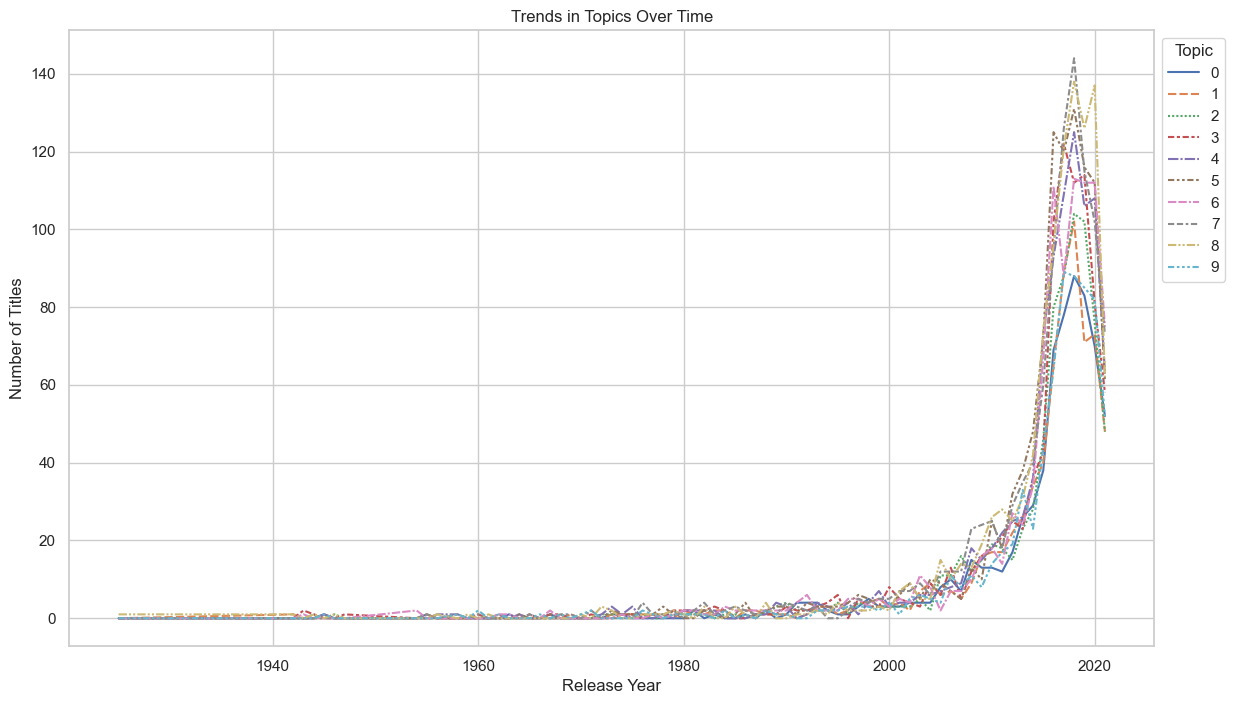

In [331]:
# Group by year and topic to count the number of titles in each topic per year
topic_trends = df.groupby(['release_year', 'dominant_topic']).size().unstack(fill_value=0)

# Plot the trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=topic_trends)
plt.title('Trends in Topics Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Topic', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

## 18. Compare the distribution of genres and ratings between Netflix original content and licensed content. Are there any noticeable differences in content focus or target audience?


['title', 'release_year', 'description', 'description_clean', 'dominant_topic']

In [351]:
# Assuming df is your DataFrame

# Step 1: Identify potential Netflix originals based on keywords in the description
df['is_netflix_original'] = df['description'].str.contains('Netflix Original', case=False, na=False)

# Step 2: Analyze the distribution of dominant topics
originals_topic_distribution = df[df['is_netflix_original']]['dominant_topic'].value_counts(normalize=True) * 100
licensed_topic_distribution = df[~df['is_netflix_original']]['dominant_topic'].value_counts(normalize=True) * 100

# Step 3: Compare the distributions
print("Netflix Originals Topic Distribution:\n", originals_topic_distribution)
print("Licensed Content Topic Distribution:\n", licensed_topic_distribution)


Netflix Originals Topic Distribution:
 dominant_topic
3    33.333333
5    33.333333
4    33.333333
Name: proportion, dtype: float64
Licensed Content Topic Distribution:
 dominant_topic
8    11.982249
7    11.845699
5    11.754665
4    10.685025
6    10.616750
3    10.184342
2     8.807465
1     8.192990
9     8.124716
0     7.806099
Name: proportion, dtype: float64


In [359]:
# Categorize content based on release year as a proxy for Netflix Originals
df['content_type'] = df['release_year'].apply(lambda x: 'Netflix Original' if x >= 2016 else 'Licensed Content')

# Compare the distribution of dominant topics between Netflix Originals and Licensed Content
topic_distribution = df.groupby('content_type')['dominant_topic'].value_counts(normalize=True).unstack().fillna(0)

# Display the comparison
print(topic_distribution)


dominant_topic           0         1         2         3         4         5  \
content_type                                                                   
Licensed Content  0.078319  0.086597  0.087870  0.097740  0.106972  0.117479   
Netflix Original  0.077876  0.079292  0.088142  0.104248  0.106903  0.117699   

dominant_topic           6         7         8         9  
content_type                                              
Licensed Content  0.102515  0.122891  0.118752  0.080866  
Netflix Original  0.108142  0.115929  0.120354  0.081416  


<Figure size 1600x800 with 0 Axes>

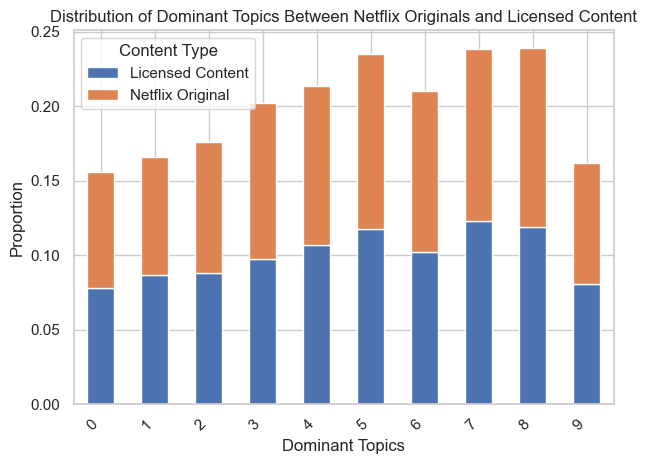

In [367]:
plt.figure(figsize=(16, 8))
topic_distribution.T.plot(kind='bar', stacked=True)

plt.title('Distribution of Dominant Topics Between Netflix Originals and Licensed Content')
plt.xlabel('Dominant Topics')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Content Type')
plt.tight_layout()

plt.show()

## 19. Analyze how the diversity of content, considering genres, countries of origin, and representation, has changed over time.


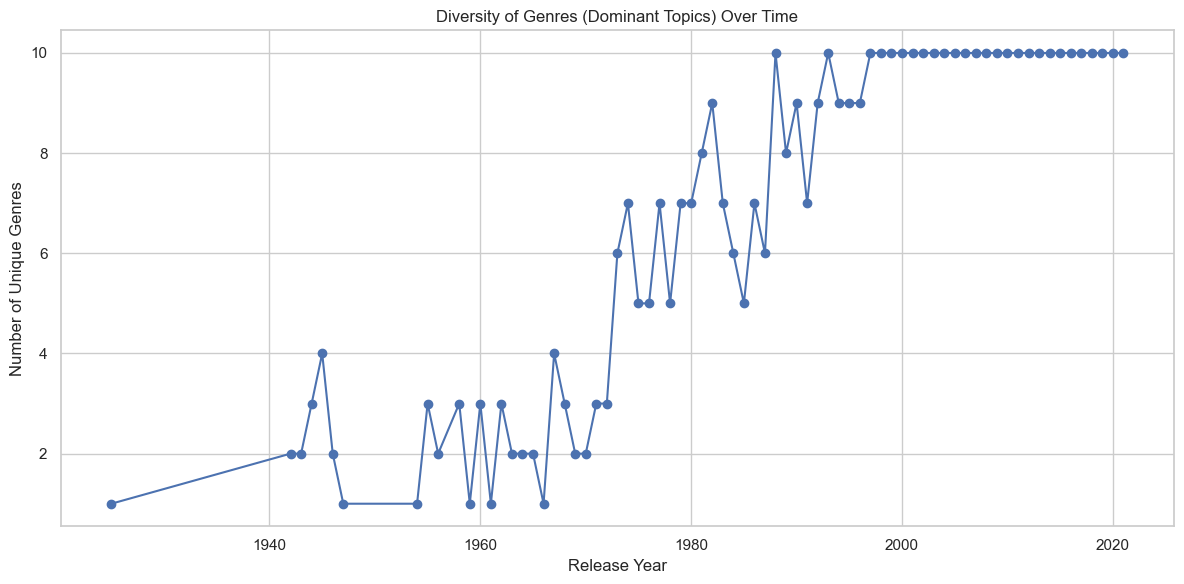

In [369]:
# Group by release year and count unique dominant topics
genre_diversity = df.groupby('release_year')['dominant_topic'].nunique()

# Plotting genre diversity over time
plt.figure(figsize=(12, 6))
genre_diversity.plot(kind='line', marker='o')

plt.title('Diversity of Genres (Dominant Topics) Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Genres')
plt.grid(True)
plt.tight_layout()

plt.show()

## 20. Explore whether there is a correlation between the age of content (based on release year) and its current popularity or rating. Does older content remain relevant and well-rated over time?


Correlation between age of content and rating: -0.07552716259681012


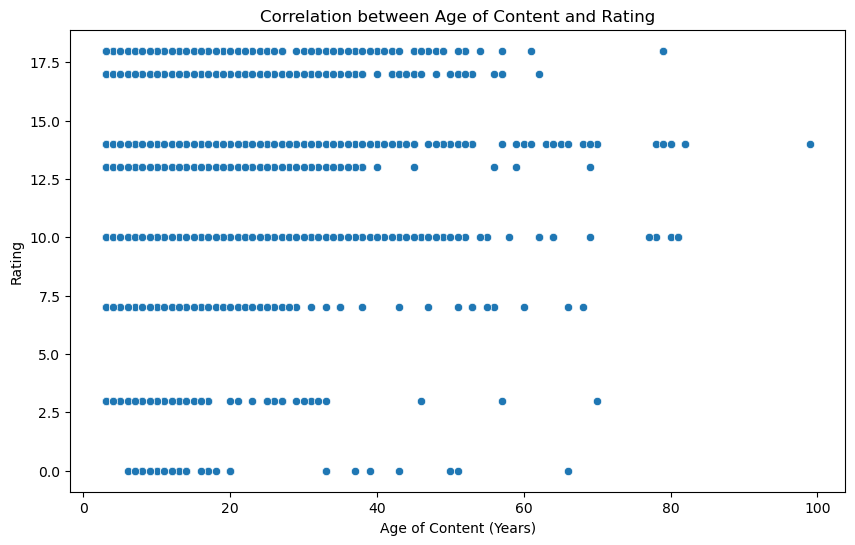

In [169]:
from datetime import datetime
current_year = datetime.now().year

# Calculate the age of the content
df['age'] = current_year - df['release_year']

# Map the ratings to a numerical scale, using .loc to avoid the SettingWithCopyWarning
rating_scale = {
    'TV-MA': 18, 'R': 17, 'TV-14': 14, 'PG-13': 13,
    'TV-PG': 10, 'PG': 10, 'TV-Y7': 7, 'G': 7, 
    'TV-Y': 3, 'TV-G': 3, 'NR': 0, 'UR': 0
}

df.loc[:, 'numeric_rating'] = df['rating'].map(rating_scale)

# Drop rows where the numeric_rating or age is missing
df = df.dropna(subset=['numeric_rating', 'age'])

# Calculate the correlation between age and rating
correlation = df['age'].corr(df['numeric_rating'])
print(f"Correlation between age of content and rating: {correlation}")

# Visualize the relationship between age and rating
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='numeric_rating', data=df)

plt.title('Correlation between Age of Content and Rating')
plt.xlabel('Age of Content (Years)')
plt.ylabel('Rating')
plt.show()